# <CENTER> **Исследование данных по устойчивой энергетике (2000-2020)**
## <CENTER> **Исследование потребляемой энергии**

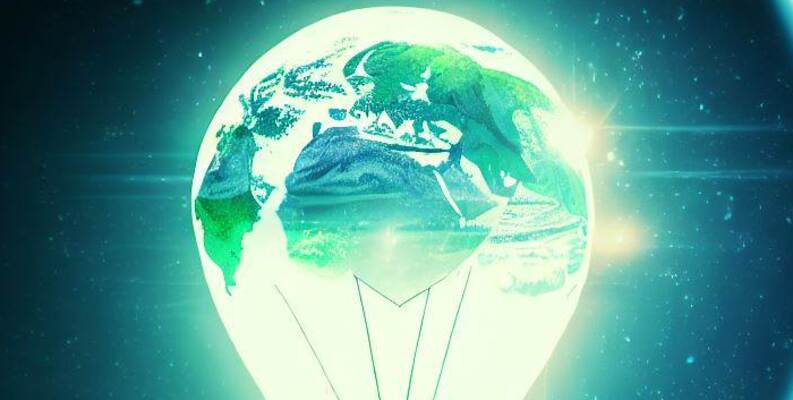

### **Описание:**

Предоставлен набор данных, демонстрирующий показатели устойчивой энергетики и другие полезные факторы по всем странам с 2000 по 2020 год. В нём собрана такая информация, как доступ к электричеству, возобновляемые источники энергии, выбросы углерода, энергоемкость, финансовые потоки и экономический рост.

**Задача:**

Исследуя данные по энергетике за период с 2000 по 2020 год необходимо спрогнозировать будущее потребление энергии.

**Импортируем необходимые библиотеки:**

In [1]:
# Для работы с данными
import numpy as np
import pandas as pd
import category_encoders as ce


# Для построения графиков
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go


# Для построения моделей
from sklearn import feature_selection
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble
from sklearn import model_selection
from sklearn import tree
from xgboost import XGBRegressor
import torch
import optuna

# LightAutoML
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task         

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Загрузка данных:**

In [87]:
# Загрузка DataFrame
sustainable_energy_data = pd.read_csv('data/global-data-on-sustainable-energy (1).csv', sep = ',')

# Создаём копию
sustainable_energy_df = sustainable_energy_data.copy()

### **Этапы работы над проектом:**

**`1.` Базовый анализ и знакомство с данными**;

**`2.` Очистка данных**;

**`3.` Разведывательный анализ данных**;

**`4.` Feature engineering (Создание новых признаков)**;

**`5.` Отбор признаков**;

**`6.` Machine Learning**;

**`7.` Вывод**.

## <CENTER> **`1.` Базовый анализ и знакомство с данными**

#### $1.1$

* Выведем информацию по таблице:

In [88]:
# Выведем размерность данных
print(f'Размерность данных: {sustainable_energy_df.shape}\n')

# Выведем первые пять строк
sustainable_energy_df.head()

Размерность данных: (3649, 21)



Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683814   
4                                       NaN    1.414118      211.382074   

   Density\n(P/Km2) Land Area(Km2)  Latitude  Longitude  
0                60       652230.0  33.93911  67.709953  
1          

### **Основные характеристики:** 

* `Entity`: название страны или региона, по которому предоставляются данные;

* `Year` : год, за который представлены данные, в диапазоне от 2000 до 2020 года;

* `Access to electricity (% of population)`: процент населения, имеющего доступ к электричеству;

* `Access to clean fuels for cooking (% of population)`: процент населения, в основном использующего чистые виды топлива;

* `Renewable-electricity-generating-capacity-per-capita`: установленная мощность возобновляемой энергии на человека;

* `Financial flows to developing countries (US $)`: помощь и содействие со стороны развитых стран для проектов в области чистой энергии;

* `Renewable energy share in total final energy consumption (%)`: процент возобновляемой энергии в конечном потреблении энергии;

* `Electricity from fossil fuels (TWh)`: электроэнергия, выработанная из ископаемого топлива (уголь, нефть, газ) в тераватт-часах;

* `Electricity from nuclear (TWh)`: электроэнергия, выработанная на АЭС, в тераватт-часах;

* `Electricity from renewables (TWh)`: электроэнергия, вырабатываемая из возобновляемых источников (гидроэнергия, солнечная энергия, энергия ветра и т. д.) в тераватт-часах;

* `Low-carbon electricity (% electricity)`: процент электроэнергии из источников с низким уровнем выбросов углерода (атомная энергетика и возобновляемые источники энергии);

* `Energy intensity level of primary energy (MJ/$2011 PPP GDP)`: потребление энергии на единицу ВВП по паритету покупательной способности;

* `Value_co2_emissions (metric tons per capita)`: выбросы углекислого газа на человека в метрических тоннах;

* `Renewables (% equivalent primary energy)`: эквивалентная первичная энергия, полученная из возобновляемых источников;

* `GDP growth (annual %)`: годовой темп роста ВВП, рассчитанный на основе постоянной местной валюты;

* `GDP per capita`: валовой внутренний продукт на человека;

* `Density (P/Km2)`: плотность населения в людях на квадратный километр;

* `Land Area (Km2)`: общая площадь земли в квадратных километрах;

* `Latitude`: широта центра страны в десятичных градусах;

* `Longitude`: долгота центра страны в десятичных градусах;



**Целевой признак:**

* `Primary energy consumption per capita (kWh/person)`: потребление энергии на человека в киловатт-часах.

#### $1.2$

* Выведем информацию по признакам:

In [89]:
sustainable_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

В данных представлены признаки следующих типов:

   * *object* - 2 признака,
   * *int64* - 1 признак,
   * *float64* - 18 признаков.

#### $1.3$

* Выведем описательные характеристики по признакам:

In [90]:
sustainable_energy_df.describe()

Year  Access to electricity (% of population)  \
count  3649.000000                              3639.000000   
mean   2010.038367                                78.933702   
std       6.054228                                30.275541   
min    2000.000000                                 1.252269   
25%    2005.000000                                59.800890   
50%    2010.000000                                98.361570   
75%    2015.000000                               100.000000   
max    2020.000000                               100.000000   

       Access to clean fuels for cooking  \
count                        3480.000000   
mean                           63.255287   
std                            39.043658   
min                             0.000000   
25%                            23.175000   
50%                            83.150000   
75%                           100.000000   
max                           100.000000   

       Renewable-electricity-generating-capacity-per-capita  \
count                                        2718.000000      
mean                                          113.137498      
std                                           244.167256      
min                                             0.000000      
25%                                             3.540000      
50%                                            32.910000      
75%                                           112.210000      
max                                          3060.190000      

       Financial flows to developing countries (US $)  \
count                                    1.560000e+03   
mean                                     9.422400e+07   
std                                      2.981544e+08   
min                                      0.000000e+00   
25%                                      2.600000e+05   
50%                                      5.665000e+06   
75%                                      5.534750e+07   
max                                      5.202310e+09   

       Renewable energy share in the total final energy consumption (%)  \
count                                        3455.000000                  
mean                                           32.638165                  
std                                            29.894901                  
min                                             0.000000                  
25%                                             6.515000                  
50%                                            23.300000                  
75%                                            55.245000                  
max                                            96.040000                  

       Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
count                          3628.000000                     3523.000000   
mean                             70.365003                       13.450190   
std                             348.051866                       73.006623   
min                               0.000000                        0.000000   
25%                               0.290000                        0.000000   
50%                               2.970000                        0.000000   
75%                              26.837500                        0.000000   
max                            5184.130000                      809.410000   

       Electricity from renewables (TWh)  \
count                        3628.000000   
mean                           23.968010   
std                           104.431085   
min                             0.000000   
25%                             0.040000   
50%                             1.470000   
75%                             9.600000   
max                          2184.940000   

       Low-carbon electricity (% electricity)  \
count                             3607.000000   
mean                                36.801182   
std                                 34.31488

## <CENTER> **`2.` Очистка данных**

На данном этапе выявим и очистим данные от пропусков, дубликатов и выбрасов.

#### $2.1$

* Проверим данные на наличие пропусков:

Суммарное количество пропусков в данных: 6978 

Информация по количествам пропусков: 

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary ene

<Axes: >

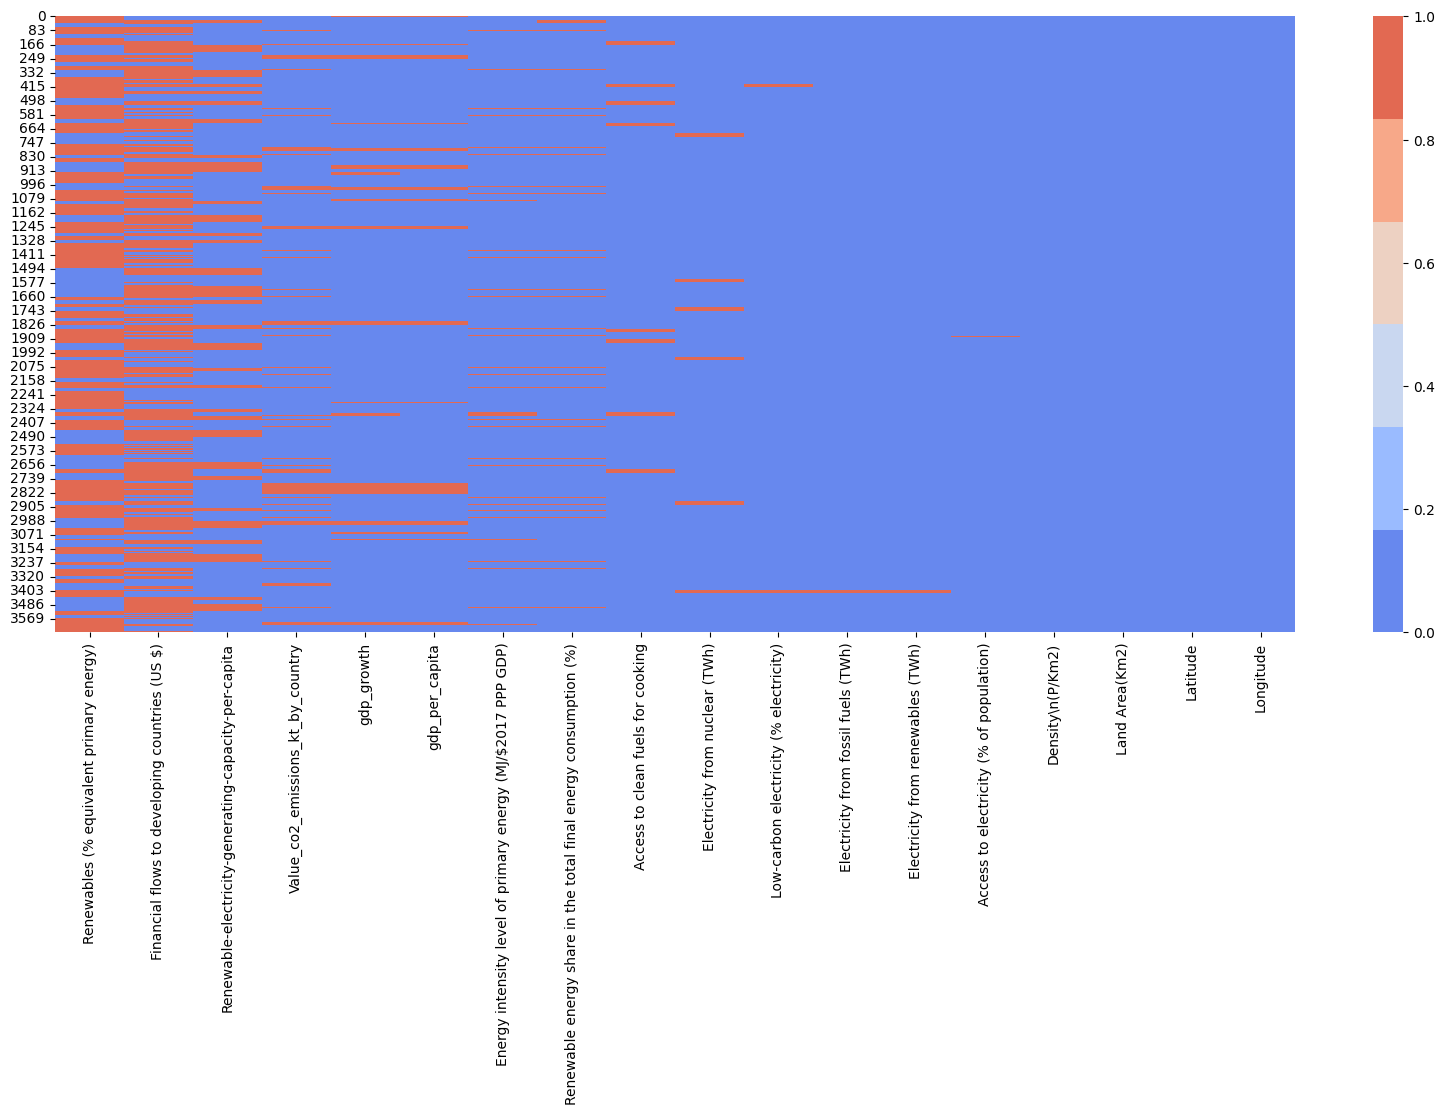

In [91]:
# Выводим суммарное количество пропусков
print('Суммарное количество пропусков в данных: {} \n'.format(sustainable_energy_df.isnull().sum().sum()))

# Выводим признаки с сумрным количеством пропусков
print('Информация по количествам пропусков: \n\n{} \n'.format(sustainable_energy_df.isnull().sum()))



# Построим тепловую карту пропусков
# Создаём функцию отображения пропущенных значений на тепловой карте
def missing_values_heatmap(data):
    
    # Рассчитываем количество пропусков
    cols_null_persent = data.isnull().mean() * 100
    cols_with_null = cols_null_persent[cols_null_persent > 0].sort_values(ascending = False)
    print(cols_with_null)
    
    # Задаём параметры графика
    colors = sns.color_palette('coolwarm')
    fig = plt.figure(figsize = (20, 8))
    cols = cols_with_null.index
    
    # Строим тепловую карту
    ax = sns.heatmap(
        data = data[cols].isnull(),
        cmap = sns.color_palette(colors)
    )
    
    return ax


# Применяем полученную функцию к нашему датасету
missing_values_heatmap(sustainable_energy_df)

**Вывод:**

Из полученной информации видно, что пропуски имеют следующие признаки:

  * *Renewables (% equivalent primary energy)*___________________________58.563 %
  * *Financial flows to developing countries (US $)*_____________________57.248 %
  * *Renewable-electricity-generating-capacity-per-capita*_______________25.513 %
  * *Value_co2_emissions_kt_by_country*__________________________________11.729 %
  * *gdp_growth*__________________________________________________________8.687 %
  * *gdp_per_capita*______________________________________________________7.728 %
  * *Energy intensity level of primary energy (MJ/$2017 PPP GDP)*_________5.672 %
  * *Renewable energy share in the total final energy consumption (%)*____5.316 %
  * *Access to clean fuels for cooking*___________________________________4.631 %
  * *Electricity from nuclear (TWh)*______________________________________3.453 %
  * *Low-carbon electricity (% electricity)*______________________________1.151 %
  * *Electricity from fossil fuels (TWh)*_________________________________0.575 %
  * *Electricity from renewables (TWh)*___________________________________0.575 %
  * *Access to electricity (% of population)*_____________________________0.274 %
  * *Density\n(P/Km2)*____________________________________________________0.027 %
  * *Land Area(Km2)*______________________________________________________0.027 %
  * *Latitude*____________________________________________________________0.027 %
  * *Longitude*___________________________________________________________0.027 %

* Обработаем пропущенные значения следующим образом:

    * Признаки `Renewables (% equivalent primary energy)` и `Financial flows to developing countries (US $)` удалим, так как количество пропущенных значений в них превышает $50%$;

    * Пропуски в признаках `Renewable-electricity-generating-capacity-per-capita` и `Value_co2_emissions_kt_by_country` заполним **средним** значением;

    * Пропуски в признаках `gdp_growth`, `gdp_per_capita`, `Energy intensity level of primary energy (MJ/$2017 PPP GDP)` и `Renewable energy share in the total final energy consumption (%)` заполним **медианным** значением;

    * В остальных случаях удалим строки.

In [92]:
# Удаляем признаки из данных
sustainable_energy_df = sustainable_energy_df.drop(columns = [
    'Renewables (% equivalent primary energy)',
    'Financial flows to developing countries (US $)'
])



# Заполняем пропущенные значения средним
columns_to_fill_mean = [
    'Renewable-electricity-generating-capacity-per-capita',
    'Value_co2_emissions_kt_by_country'
]
sustainable_energy_df[columns_to_fill_mean] = sustainable_energy_df[columns_to_fill_mean].fillna(sustainable_energy_df[columns_to_fill_mean].mean())



# Заполняем пропущенные значения медианой
columns_to_fill_median = [
    'gdp_growth',
    'gdp_per_capita',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Renewable energy share in the total final energy consumption (%)'
]
sustainable_energy_df[columns_to_fill_median] = sustainable_energy_df[columns_to_fill_median].fillna(sustainable_energy_df[columns_to_fill_median].median())



# Удаляем строки с пропущенными значениями
sustainable_energy_df = sustainable_energy_df.dropna(subset = [
    'Access to clean fuels for cooking',
    'Electricity from nuclear (TWh)',
    'Low-carbon electricity (% electricity)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from renewables (TWh)',
    'Access to electricity (% of population)',
    'Density\\n(P/Km2)',
    'Land Area(Km2)',
    'Latitude',
    'Longitude'
])

Выведем количество пропусков:

In [93]:
# Выводим признаки с сумрным количеством пропусков
print('Информация по количествам пропусков: \n\n{} \n\n'.format(sustainable_energy_df.isnull().sum()))


# Выводим размерность таблицы
print('Размерность таблицы после удаления пропусков: {}'.format(sustainable_energy_df.shape))

Информация по количествам пропусков: 

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_growth                                         

#### $2.2$

* Проверяем данные на наличие дубликатов:

In [94]:
# Создаём список признаков
dupl_columns = list(sustainable_energy_df.columns)


# Создаём маску дубликатов с помощью метода duplicated() и произведём фильтрацию
mask = sustainable_energy_df.duplicated(subset = dupl_columns)
train_duplicates = sustainable_energy_df[mask]
print(f'Число найденных дубликатов: {train_duplicates.shape[0]}')

Число найденных дубликатов: 0


#### $2.3$

* Проверяем данные на наличие выбрасов.

Создадим список признаков с возможными выбросами:

In [95]:
features_list = [
    'Renewable-electricity-generating-capacity-per-capita',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)',
    'Low-carbon electricity (% electricity)',
    'Primary energy consumption per capita (kWh/person)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Value_co2_emissions_kt_by_country',
    'gdp_growth',
    'gdp_per_capita',
    'Land Area(Km2)'
]

Создадим функцию для поиска выбросов:

In [96]:
# Функция для поиска выбросов через IQR
def detect_outliers_iqr(data, features):
    
    # Создаём словарь, ключами которого будут индексы признаков,
    # а значениями - их количество
    outliers_dict = {}
    
    
    # Пройдёмся циклом for по признакам
    for feature in features:
        
        Q1 = data[feature].quantile(0.25)         # первый квартиль
        Q3 = data[feature].quantile(0.75)         # третий квартиль
        IQR = Q3 - Q1                             # межквартильный размах
        
        # Границы (нижняя и верхняя) для определения выбросов
        lower_bound = Q1 - 1.5 * IQR    
        upper_bound = Q3 + 1.5 * IQR   
        
        # Поиск выбросов
        outliers_dict[feature] = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)][feature]  
        
    return outliers_dict

Организуем поиск выбросов:

In [97]:
# Создаём переменную, в котором будем хранить признаки с количеством выбросов
outliers = detect_outliers_iqr(
    data = sustainable_energy_df,
    features = features_list
)


# Вывод выбросов
for feature, values in outliers.items():
    print(f'Количество выбросов в признаке {feature}:')
    print(len(values))
    print()

Количество выбросов в признаке Renewable-electricity-generating-capacity-per-capita:
246

Количество выбросов в признаке Renewable energy share in the total final energy consumption (%):
0

Количество выбросов в признаке Electricity from fossil fuels (TWh):
462

Количество выбросов в признаке Electricity from nuclear (TWh):
557

Количество выбросов в признаке Electricity from renewables (TWh):
491

Количество выбросов в признаке Low-carbon electricity (% electricity):
0

Количество выбросов в признаке Primary energy consumption per capita (kWh/person):
255

Количество выбросов в признаке Energy intensity level of primary energy (MJ/$2017 PPP GDP):
289

Количество выбросов в признаке Value_co2_emissions_kt_by_country:
296

Количество выбросов в признаке gdp_growth:
258

Количество выбросов в признаке gdp_per_capita:
471

Количество выбросов в признаке Land Area(Km2):
357



Из полученных расчётов были выявлены выбросы в следующих признаках:

* `Renewable-electricity-generating-capacity-per-capita`;

* `Electricity from fossil fuels (TWh)`;

* `Electricity from nuclear (TWh)`;

* `Primary energy consumption per capita (kWh/person)`;

* `Energy intensity level of primary energy (MJ/$2017 PPP GDP)`;

* `Value_co2_emissions_kt_by_country`;

* `gdp_growth`;

* `gdp_per_capita`;

* `Land Area(Km2)`.

Построим гистограмму и коробчатую диаграмму для признака `Renewable-electricity-generating-capacity-per-capita`:

Text(0.5, 1.0, 'Renewable electricity Boxplot')

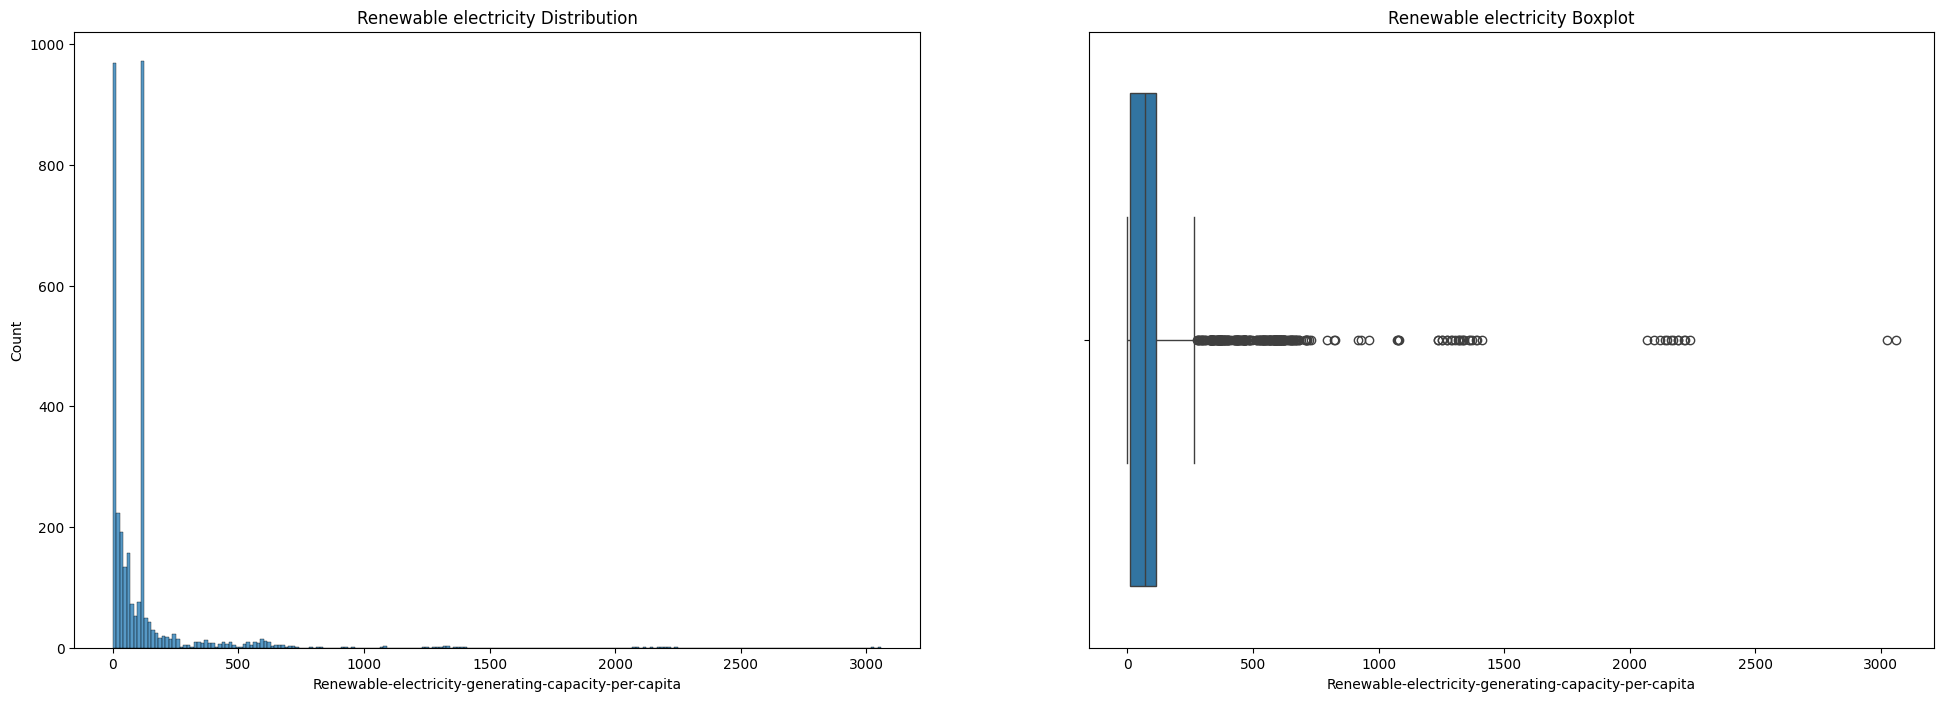

In [37]:
# Задаём параметры 
fig, axes = plt.subplots(
    nrows = 1, 
    ncols = 2, 
    figsize = (24, 8)
)



# Строим гистограмму
histplot = sns.histplot(
    data = sustainable_energy_df,
    x = 'Renewable-electricity-generating-capacity-per-capita',
    ax = axes[0]
);

# Название гистограммы
histplot.set_title('Renewable electricity Distribution');

# Строим коробчатую диаграмму
boxplot = sns.boxplot(
    data = sustainable_energy_df,
    x = 'Renewable-electricity-generating-capacity-per-capita',
    ax = axes[1]
);

# Название коробчатой диаграммы
boxplot.set_title('Renewable electricity Boxplot')

Удалим найденные выбросы:

In [98]:
# Выделяем признак 'Renewable-electricity-generating-capacity-per-capita'
x = sustainable_energy_df['Renewable-electricity-generating-capacity-per-capita']

# Вычисляем 25-ый и 75-ый квантили (первый и третий квартили)
Q1, Q3 = np.percentile(x, 25), np.percentile(x, 75)

# Вычисляем межквартильное расстояние
IQR = Q3 - Q1

# Вычисляем нижнюю границу и нижнюю границы поиска
lower_bound = Q1 - (IQR * 1.5)
upper_bound = Q3 + (IQR * 1.5)

# Выводим верхнюю границу и нижнюю границы поиска
print(f'Верхняя граница поиска: {round(upper_bound)}')
print(f'Нижняя граница поиска: {round(lower_bound)}')

Верхняя граница поиска: 270
Нижняя граница поиска: -148


In [99]:
# Рассчитаенм количество выбросов
outliers = sustainable_energy_df[(x < lower_bound) | (x > upper_bound)]

# Удаляем выбросы
sustainable_energy_df = sustainable_energy_df[(x >= lower_bound) & (x <= upper_bound)]

print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {sustainable_energy_df.shape[0]}')

Число выбросов по методу Тьюки: 246
Результирующее число записей: 3099


Построим график с очищенными данными:

Text(0.5, 1.0, 'Cleaned Renewable electricity Boxplot')

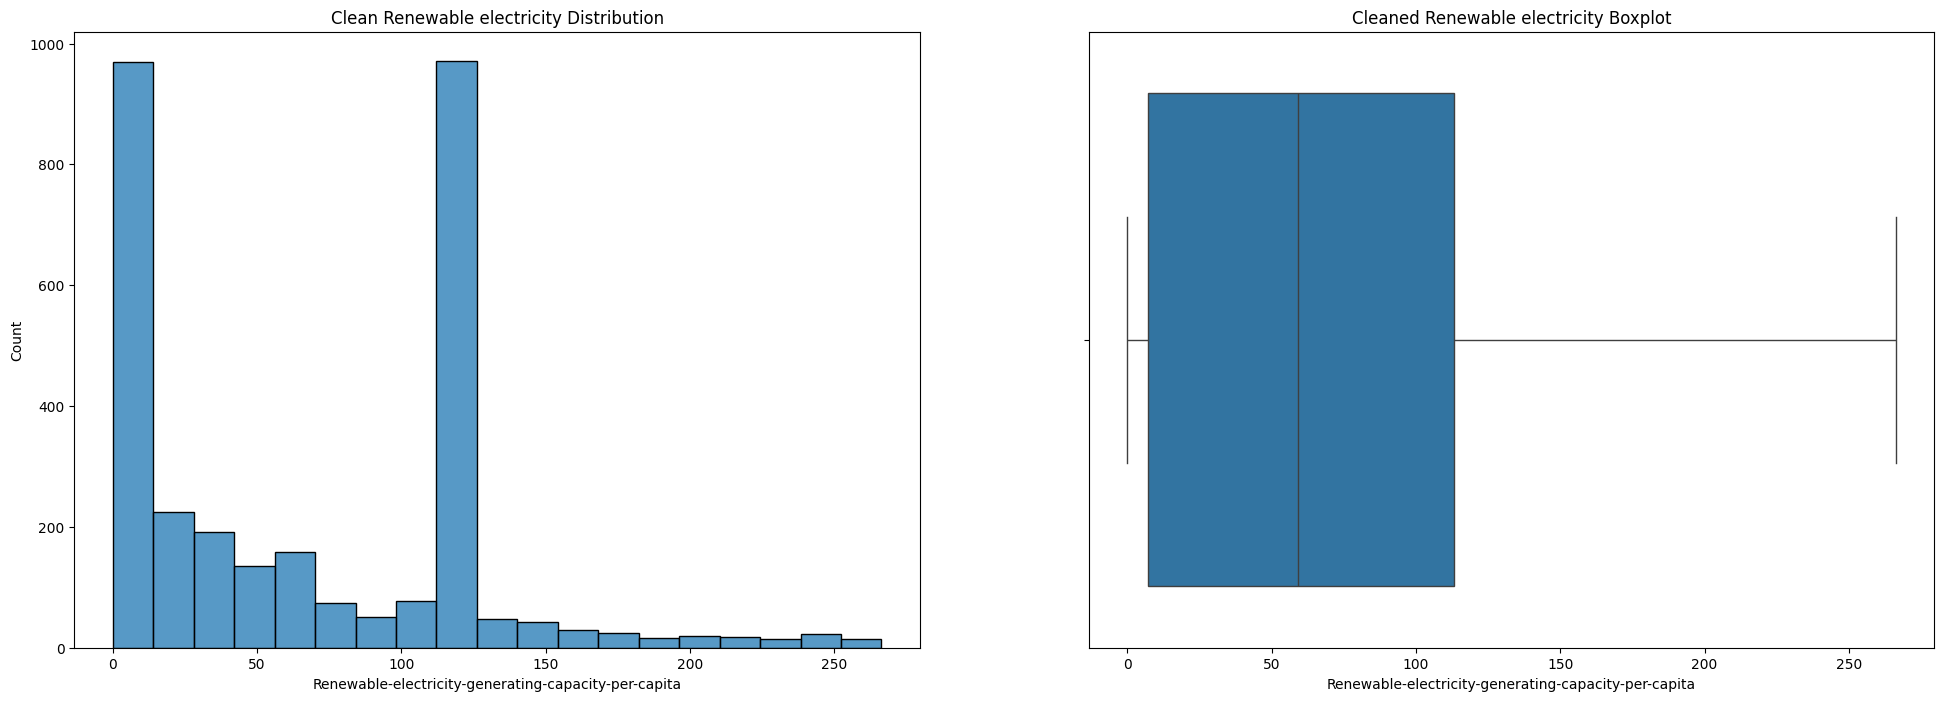

In [40]:
# Задаём параметры графика
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 8))


# Строим гистограмму
histplot = sns.histplot(
    data = sustainable_energy_df,
    x = 'Renewable-electricity-generating-capacity-per-capita',
    ax = axes[0]
);

# Название графика
histplot.set_title('Clean Renewable electricity Distribution');



# Строим коробчатую диаграмму
boxplot = sns.boxplot(
    data = sustainable_energy_df,
    x = 'Renewable-electricity-generating-capacity-per-capita',
    ax = axes[1]
);

# Название графика
boxplot.set_title('Cleaned Renewable electricity Boxplot')

Теперь создадим функцию `remove_outliers` для очистки выбрасов из остальных признаков:

In [100]:
# Определяем функцию для удаления выбросов
def remove_outliers(column):
    
    # Вычисляем 25-ый и 75-ый квантили
    # и межквартильное расстояние
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    
    # Рассчитываем верхнюю и нижнюю границы 
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    
    return column[(column >= lower_bound) & (column <= upper_bound)]

Применяем полученную функцию к следующим столбцам:

* `Electricity from fossil fuels (TWh)`;

* `Electricity from nuclear (TWh)`;

* `Primary energy consumption per capita (kWh/person)`;

* `Energy intensity level of primary energy (MJ/$2017 PPP GDP)`;

* `Value_co2_emissions_kt_by_country`;

* `gdp_growth`;

* `gdp_per_capita`;

* `Land Area(Km2)`.

In [101]:
# Создаём список столбцов
columns_to_clean = [
    'Electricity from fossil fuels (TWh)',
    'Primary energy consumption per capita (kWh/person)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Value_co2_emissions_kt_by_country',
    'gdp_growth',
    'gdp_per_capita',
    'Land Area(Km2)'
]


# Обрабатываем выбросы
sustainable_energy_df[columns_to_clean] = sustainable_energy_df[columns_to_clean].apply(remove_outliers)

# Удалим образовавшиеся пропущенные значения
sustainable_energy_df = sustainable_energy_df.dropna()
print(f'Результирующее число записей: {sustainable_energy_df.shape[0]}')

Результирующее число записей: 1814


## <CENTER> **`3.` Разведывательный анализ данных**

В данной части проекта мы:

   * изучаем сгенерированный набор данных;

   * дополним наш анализ визуализациями, иллюстрирующими исследование.


Основным показателем качества решения задачи будет метрика **RMSLE (Root Mean Squared Log Error)**, которая рассчитывается на основе целевой переменной в логарифмическом масштабе.

В этом случае целесообразно сразу взять логарифм потребления энергии и считать логарифм целевым знаком при анализе:

In [102]:
# Возьмём логарифм от целевого признака, при этом создадим новый признак
sustainable_energy_df['Primary energy consumption per capita (kWh/person) log'] = np.log(sustainable_energy_df['Primary energy consumption per capita (kWh/person)'] + 1)

#### $3.1$

* Исследем, как уровень доступа к электричеству соотносится с уровнем дохода на душу населения:

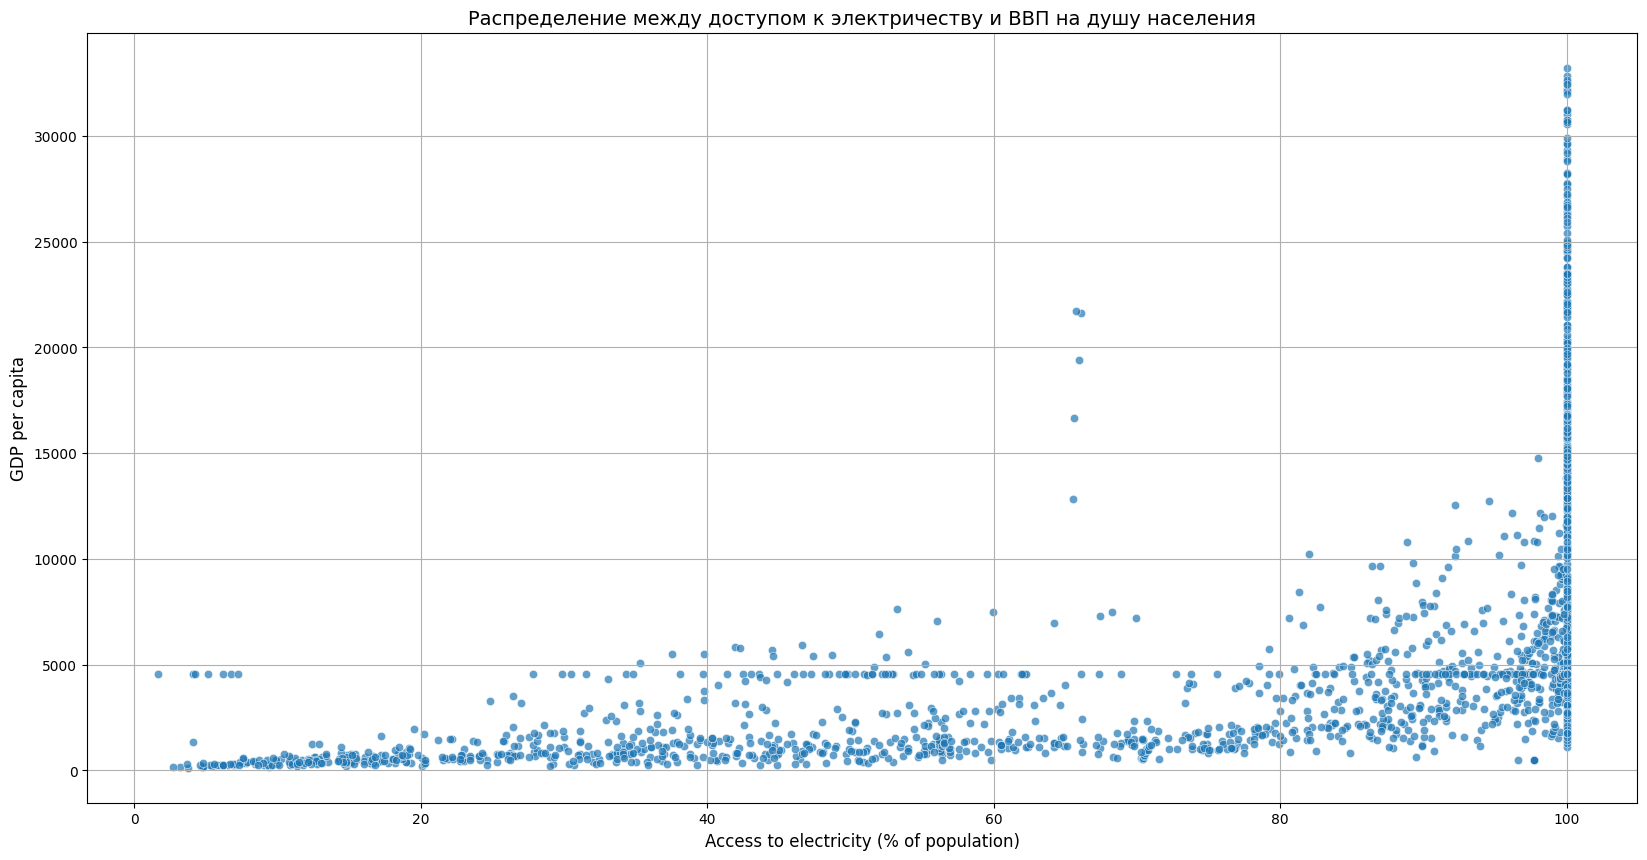

In [20]:
# Задаём параметры графика
plt.figure(figsize = (20, 10))


# Строим диаграмму рассеяния
sns.scatterplot(
    data = sustainable_energy_df,
    x = 'Access to electricity (% of population)',
    y = 'gdp_per_capita',
    alpha = 0.7
)

# Задаём название графика и дополнительные параметры
plt.title('Распределение между доступом к электричеству и ВВП на душу населения', fontsize = 14)
plt.xlabel('Access to electricity (% of population)', fontsize = 12)
plt.ylabel('GDP per capita', fontsize = 12)
plt.grid(True)
plt.show()

**Вывод:**

* **Высокая концентрация точек возле 100% доступа к электричеству**: Это указывает на то, что в странах с почти полным доступом к электричеству ВВП на душу населения варьируется, но в большинстве случаев находится на высоком уровне,

* **Взаимосвязь между доступом к электричеству и ВВП**: Наблюдается положительная тенденция. В странах с низким уровнем доступа к электричеству ВВП на душу населения, как правило, также невысок,

* **Исключения**: Есть отдельные точки, где при небольшом уровне доступа к электричеству ВВП на душу населения относительно высок, что может быть связано с экономическими особенностями этих стран.

#### $3.2$

* Посмотрим, существует ли связь между доступом к чистым видам топлива и электричеству:

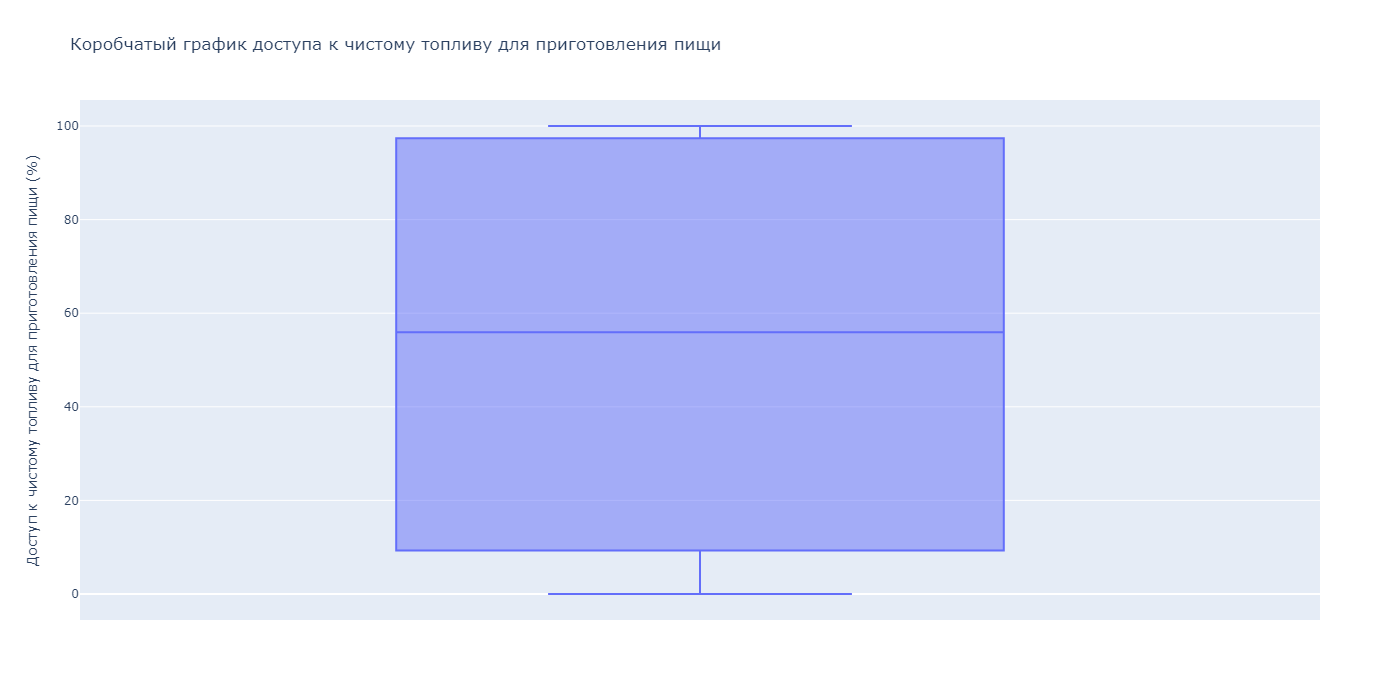

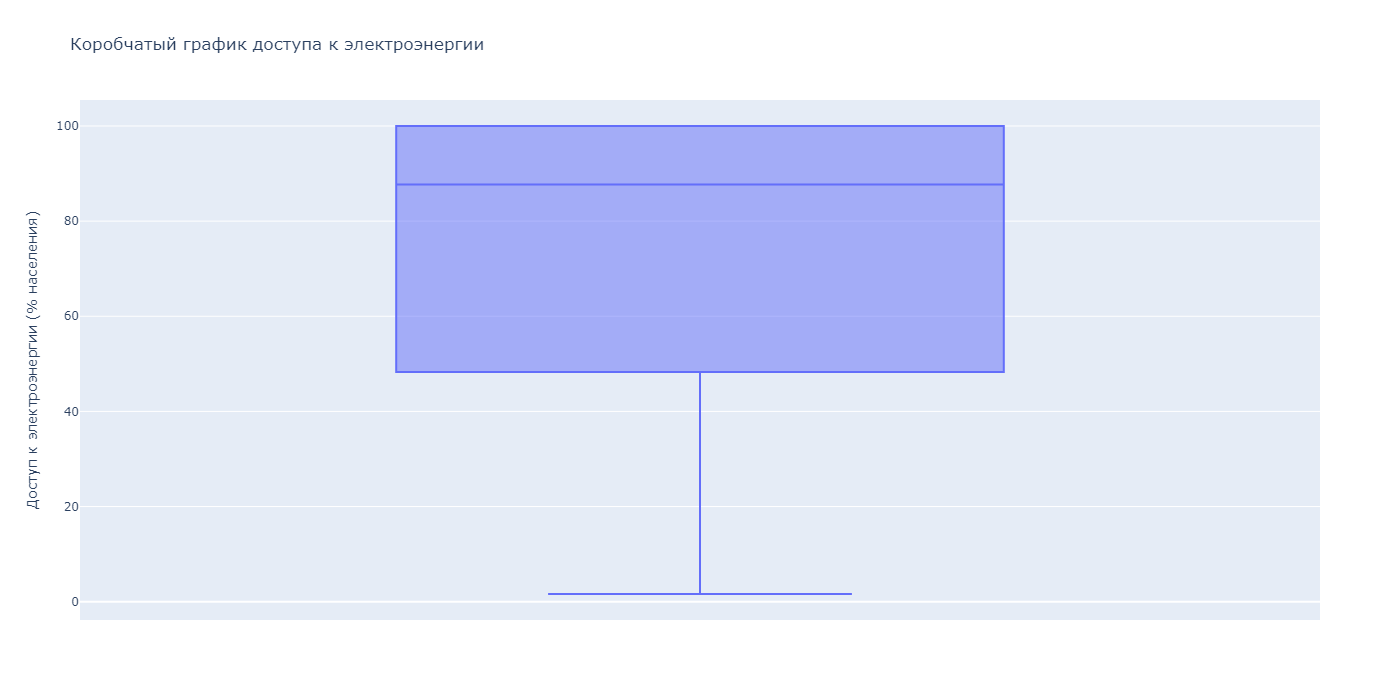

In [21]:
# Построение графика для доступа к чистым топливам
fig1 = px.box(
    sustainable_energy_df, 
    y = 'Access to clean fuels for cooking', 
    title = 'Коробчатый график доступа к чистому топливу для приготовления пищи',
    labels = {'Access to clean fuels for cooking': 'Доступ к чистому топливу для приготовления пищи (%)'},
    height = 700,
    width = 1400
)

fig1.show('png')




# Построение графика для доступа к электричеству
fig2 = px.box(
    sustainable_energy_df, 
    y = 'Access to electricity (% of population)', 
    title = 'Коробчатый график доступа к электроэнергии',
    labels = {'Access to electricity (% of population)': 'Доступ к электроэнергии (% населения)'},
    height = 700,
    width = 1400
)

fig2.show('png')

**Вывод:**

1. **Доступность топлива**:
    * Средний уровень доступности топлива находится примерно на уровне 50%,
    * Значительная часть населения имеет низкий доступ к чистому топливу (нижний квартиль близок к 20%).

2. **Доступность электричества**:
    * Средний уровень доступа к электричеству находится на уровне 80-90%,
    * Большинство населения имеет высокий доступ к электричеству.

#### $3.3$

Посмотрим, как производство электроэнергии из ископаемых источников связано с выбросами углекислого газа на душу населения:

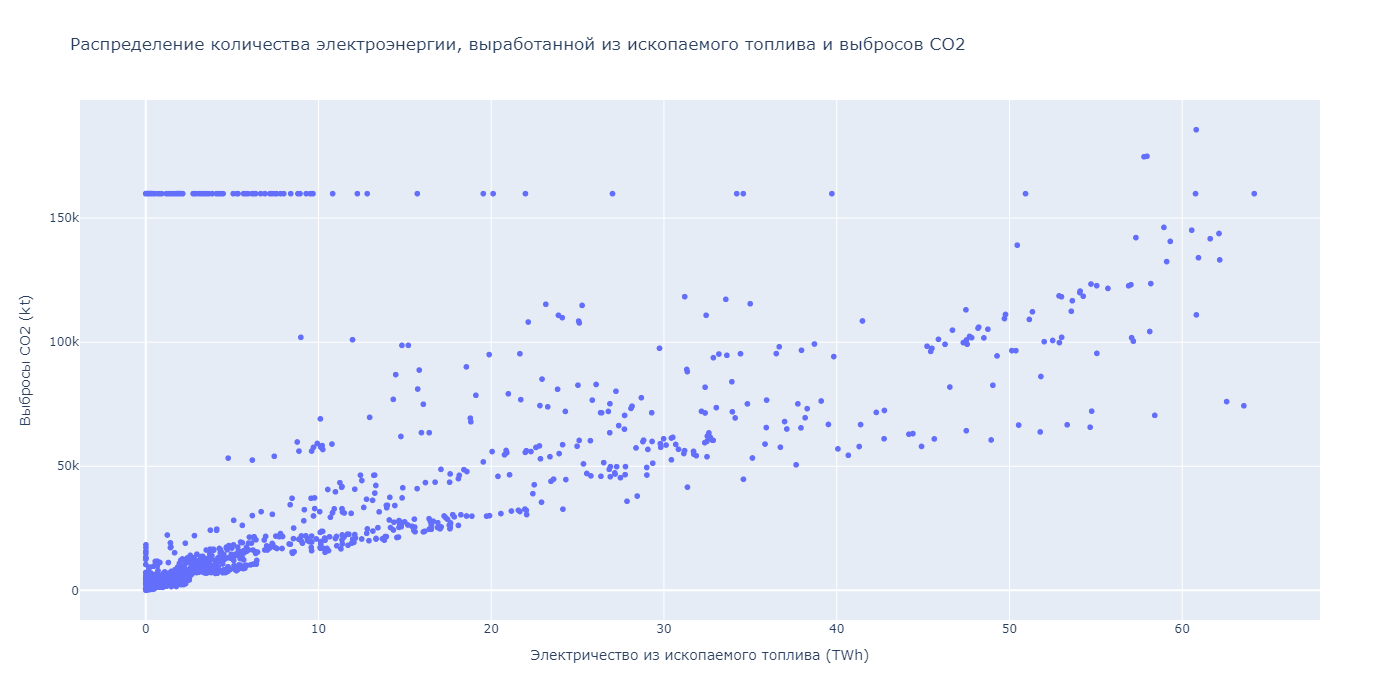

In [20]:
# Построение графика
fig = px.scatter(
    data_frame = sustainable_energy_df,
    x = 'Electricity from fossil fuels (TWh)',
    y = 'Value_co2_emissions_kt_by_country',
    title = 'Распределение количества электроэнергии, выработанной из ископаемого топлива и выбросов CO2',
    height = 700,
    width = 1400,
    
    labels = {
        'Electricity from fossil fuels (TWh)': 'Электричество из ископаемого топлива (TWh)',
        'Value_co2_emissions_kt_by_country': 'Выбросы CO2 (kt)'
    },
    
    template = 'plotly', 
    size_max = 10
)

# Вывод графика
fig.show('png')

**Выводы:**

1. На графике видна тенденция роста выбросов CO₂ с увеличением объёма электроэнергии, производимой из ископаемого топлива. Это указывает на прямую зависимость между этими показателями,


2. Данные разделены на два основных кластера:

    * Низкое производство электроэнергии (менее 10 TWh) связано с высокими выбросами CO₂ (около 950–1000 kt),
    * Более высокое производство электроэнергии (30–45 TWh) связано с более низкими выбросами CO₂ (около 700–750 kt).


3. В группе с более высоким производством электроэнергии выбросы CO₂ ниже, что может быть связано с использованием более чистых технологий, эффективных методов производства или различиями в типах ископаемого топлива.

#### $3.4$

Проверим связь между уровнем дохода и доступом к чистым видам топлива:

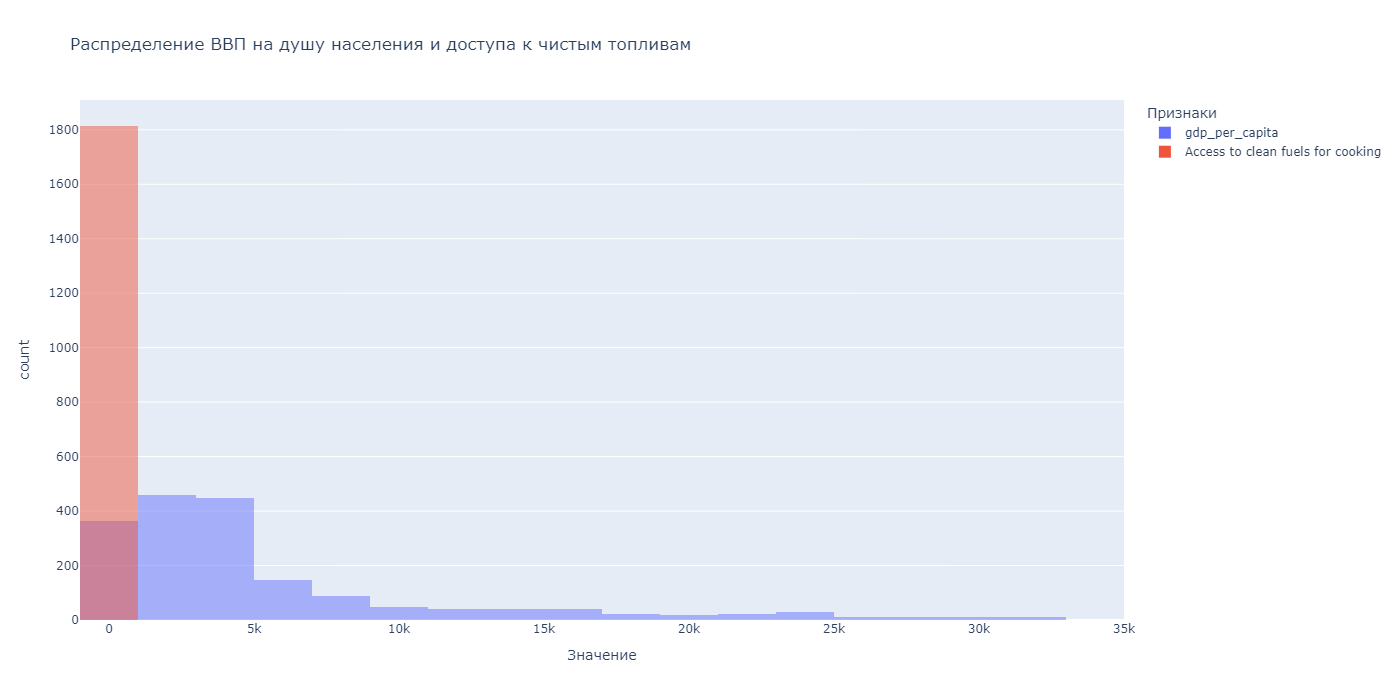

In [21]:
# Преобразуем данные в "длинный формат" для удобной работы с histogram
data_long = sustainable_energy_df.melt(
    value_vars = ['gdp_per_capita', 'Access to clean fuels for cooking'],
    var_name = 'Feature',
    value_name = 'Value')



# Построение гистограммы
fig = px.histogram(
    data_long,
    x = 'Value',
    color = 'Feature',
    barmode = 'overlay',  
    height = 700,
    width = 1400,
    title = 'Распределение ВВП на душу населения и доступа к чистым топливам',
    
    labels = {
        'Value': 'Значение',
        'Feature': 'Признаки'
    },
    
    nbins = 30
)

# Отображение графика
fig.show('png')

**Вывод:**

В странах с низким ВВП на душу населения доступ к чистым топливам ограничен, так как значения дохода ниже 20 тыс. USD составляют основную массу населения. Так же большая часть населения, которая обладает доступом к чистым видам топлива, сосредоточена в странах с невысоким ВВП на душу населения.

#### $3.5$

Построим график зависимости процента населения, имеющего доступ к электричеству по годам:

Распределение средней зависимости процента населения, имеющего доступ к электричеству по годам: 

    Year  Access to electricity (% of population)
0   2000                                68.227845
1   2001                                70.615080
2   2002                                71.773740
3   2003                                68.870567
4   2004                                67.981662
5   2005                                69.043789
6   2006                                69.387712
7   2007                                71.258222
8   2008                                72.483453
9   2009                                68.082665
10  2010                                72.874218
11  2011                                72.938939
12  2012                                74.305178
13  2013                                76.320755
14  2014                                76.202349
15  2015                                76.879697
16  2016                                76.426396
17

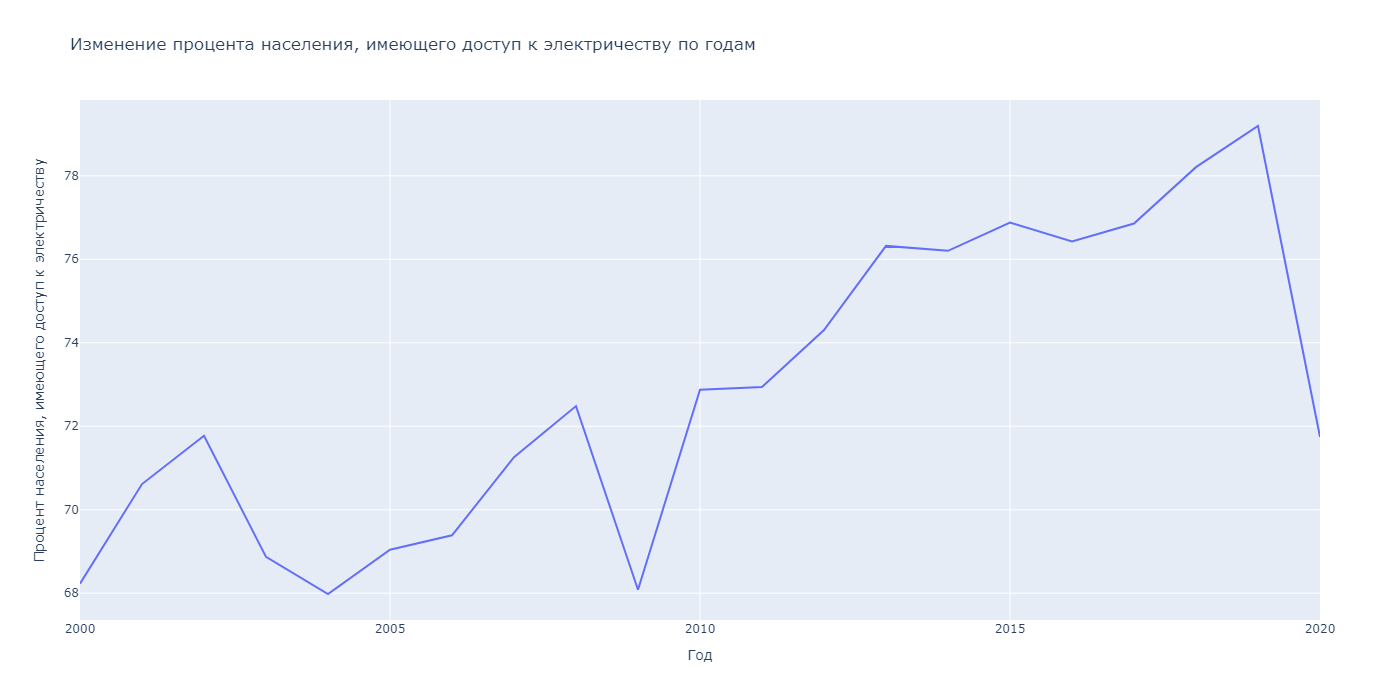

In [208]:
# Производим группировку по годамам
line_data = sustainable_energy_df.groupby(
    by = 'Year',
    as_index = False
)['Access to electricity (% of population)'].mean()

# Выводим таблицу
print('Распределение средней зависимости процента населения, имеющего доступ к электричеству по годам: \n\n{}'.format(line_data))



# Строим линейный график
fig = px.line(
    data_frame = line_data,
    x = 'Year',
    y = 'Access to electricity (% of population)',
    height = 700,
    width = 1400,
    
    labels = {
        'Year': 'Год',
        'Access to electricity (% of population)': 'Процент населения, имеющего доступ к электричеству'
    },
    
    title = 'Изменение процента населения, имеющего доступ к электричеству по годам'
)

# Выводим график
fig.show('png')

**Вывод:**

Из полученного графика видно, что количество потребителей электроэнергии начиная с 2000 года (за исключением небольших перепадов) в основном росло вплоть до 2018 года, после чего процент потребителей начал снижаться. Это может свидетельствовать о различных социально-экономических или инфраструктурных изменениях в указанный период.

#### $3.6$

Построим график зависимости годового темпа роста ВВП по годам:

Распределение средней зависимости годового темпа роста ВВП по годам: 

    Year  gdp_growth
0   2000    3.658098
1   2001    2.896857
2   2002    3.040173
3   2003    4.207222
4   2004    4.280896
5   2005    4.406499
6   2006    4.971838
7   2007    5.131019
8   2008    4.093416
9   2009    2.493401
10  2010    4.102568
11  2011    3.940308
12  2012    3.272415
13  2013    3.511791
14  2014    3.539944
15  2015    3.593954
16  2016    3.769381
17  2017    3.847264
18  2018    3.708411
19  2019    3.474590
20  2020    0.090022


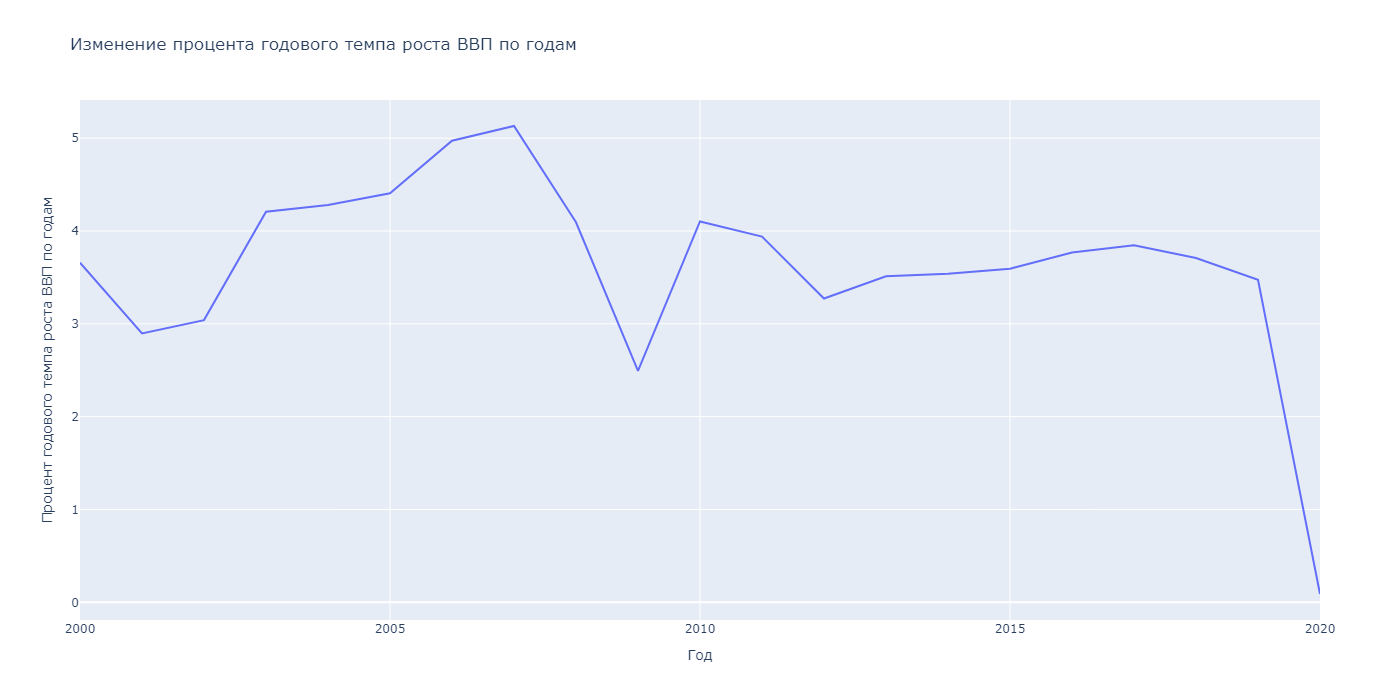

In [209]:
# Производим группировку по годам
line_data = sustainable_energy_df.groupby(
    by = 'Year',
    as_index = False
)['gdp_growth'].mean()

# Выводим таблицу
print('Распределение средней зависимости годового темпа роста ВВП по годам: \n\n{}'.format(line_data))



# Строим линейный график
fig = px.line(
    data_frame = line_data,
    x = 'Year',
    y = 'gdp_growth',
    height = 700,
    width = 1400,
    
    labels = {
        'Year': 'Год',
        'gdp_growth': 'Процент годового темпа роста ВВП по годам'
    },
    
    title = 'Изменение процента годового темпа роста ВВП по годам'
)

# Выводим график
fig.show('png')

**Вывод:**

Из полученного графика можно сделать следующие выводы:

1. **Рост в начале периода (2000–2007)**: В первые годы наблюдается плавный рост процента темпа роста ВВП, достигая пика в районе 5% в 2007 году;

2. **Резкое снижение (2008-2009)**: В 2008-2009 годах виден значительный спад, вероятно, связанный с мировым финансовым кризисом;

3. **Нестабильность (2010–2015)**: После кризиса темп роста восстановился, но с 2010 по 2015 год видна нестабильность, с тенденцией к снижению;

4. **Снижение к 2020 году**: После 2015 года темп роста продолжает снижаться, а к 2020 году происходит резкое падение. Это может быть связано с началом пандемии COVID-19 и её влиянием на экономику.

#### $3.7$

Построим график зависимости выбросов углекислого газа на человека в метрических тоннах по годам:

Распределение средней зависимости выбросов углекислого газа на человека в метрических тоннах по годам: 

    Year  Value_co2_emissions_kt_by_country
0   2000                       32183.582776
1   2001                       34419.007882
2   2002                       31393.781844
3   2003                       31736.414539
4   2004                       28903.002867
5   2005                       31269.219560
6   2006                       31177.443231
7   2007                       30624.440861
8   2008                       30933.991505
9   2009                       31630.327724
10  2010                       30054.083137
11  2011                       28818.169151
12  2012                       29649.590944
13  2013                       30201.473509
14  2014                       30088.861330
15  2015                       29816.252679
16  2016                       28019.296042
17  2017                       29864.782820
18  2018                       29114.622067
19  2019       

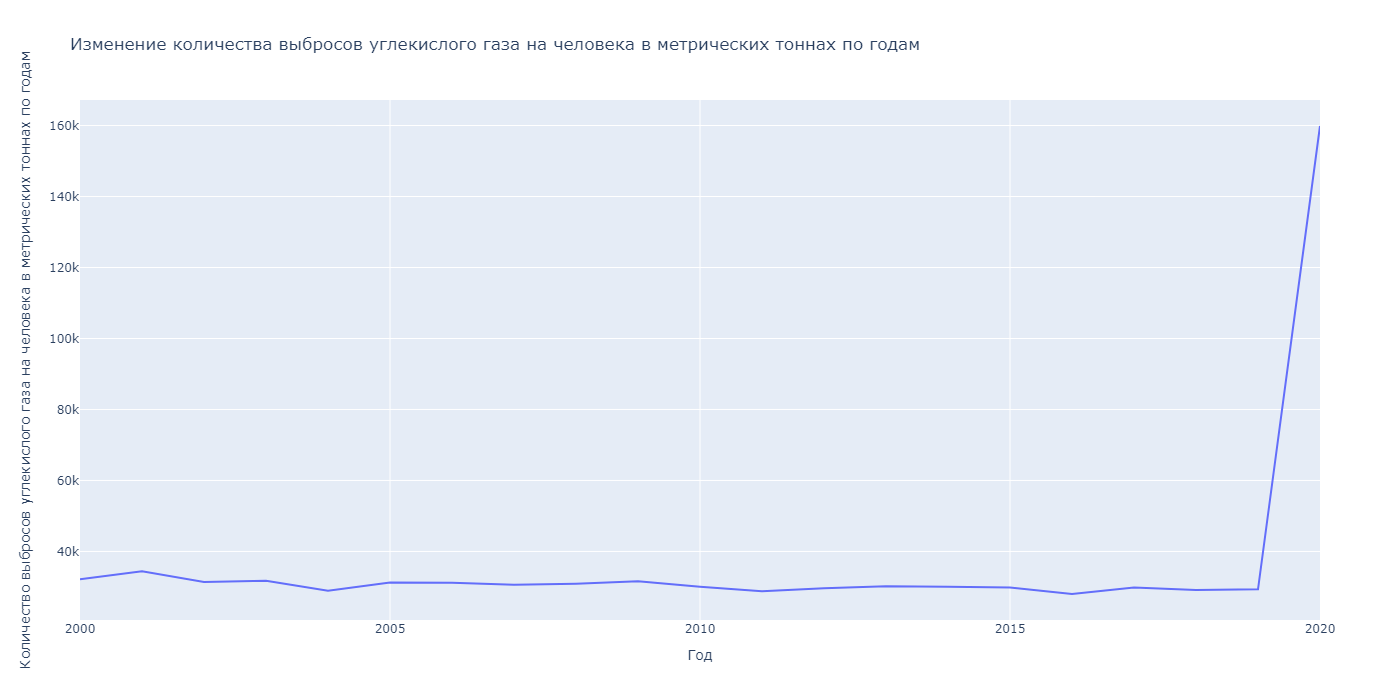

In [210]:
# Производим группировку по годам
line_data = sustainable_energy_df.groupby(
    by = 'Year',
    as_index = False
)['Value_co2_emissions_kt_by_country'].mean()

# Выводим таблицу
print('Распределение средней зависимости выбросов углекислого газа на человека в метрических тоннах по годам: \n\n{}'.format(line_data))



# Строим линейный график
fig = px.line(
    data_frame = line_data,
    x = 'Year',
    y = 'Value_co2_emissions_kt_by_country',
    height = 700,
    width = 1400,
    
    labels = {
        'Year': 'Год',
        'Value_co2_emissions_kt_by_country': 'Количество выбросов углекислого газа на человека в метрических тоннах по годам'
    },
    
    title = 'Изменение количества выбросов углекислого газа на человека в метрических тоннах по годам'
)

# Выводим график
fig.show('png')

**Вывод:**

Из построенного графика можно заключить, что среднее количество выбросов углекислого газа было минимальным и оставалось неизменным вплоть до 2019 года. Далее наблюдается резкое увеличение выбросов, составив 160 тысяч метрических тонн к 2020-му году. Это может быть связано с внезапным увеличением производства, изменением технологий или другими факторами, влияющими на выбросы углекислого газа.

#### $3.8$

Построим график зависимости потребления энергии на человека в киловатт-часах по странам:

Распределение количества потребляемой энергии на человека в киловатт-часах по странам: 

           Entity  Primary energy consumption per capita (kWh/person)
114      Zimbabwe                                          4919.5225 
113        Zambia                                          3494.5369 
112         Yemen                                          4277.2236 
111       Vanuatu                                          3346.0903 
110    Uzbekistan                                         18518.1580 
109       Ukraine                                         22768.4590 
108        Uganda                                           766.4143 
107  Turkmenistan                                         67626.9200 
106       Tunisia                                         10276.6550 
105         Tonga                                          6863.2144 


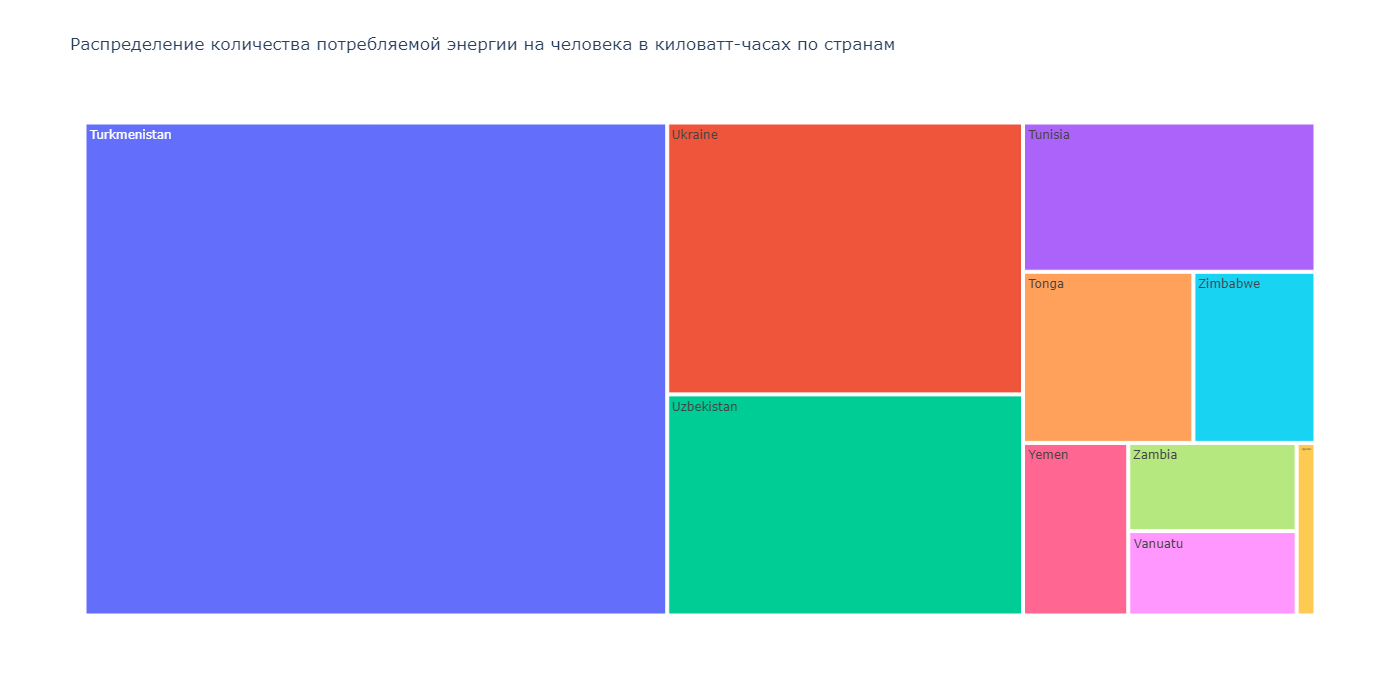

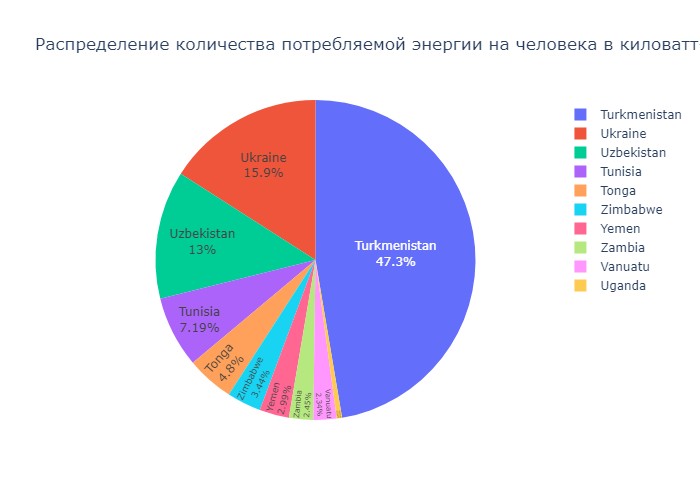

In [23]:
# Считаем среднее количество потребляемой энергии
treemap_data = sustainable_energy_df.groupby(
    by = 'Entity',
    as_index = False,
)[['Primary energy consumption per capita (kWh/person)']].max().sort_values(by = 'Entity',  ascending = False).head(10)

# Выводим таблицу
print('Распределение количества потребляемой энергии на человека в киловатт-часах по странам: \n\n{}'.format(treemap_data))



# Строим график
fig = px.treemap(
    data_frame = treemap_data,
    path = ['Entity'],
    values = 'Primary energy consumption per capita (kWh/person)',
    height = 700,
    width = 1400,
    title = 'Распределение количества потребляемой энергии на человека в киловатт-часах по странам'
)

# Отображаем график
fig.show('png')



# Строим круговую диаграмму
fig = px.pie(
    data_frame = treemap_data,
    values = 'Primary energy consumption per capita (kWh/person)',
    names = 'Entity',
    labels = 'Entity',
    title = 'Распределение количества потребляемой энергии на человека в киловатт-часах по странам'
)

# Выводим график
fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.show('png')

**Вывод:**

Из полученного графика следует, что **Туркменистан** значительно лидирует по потреблению энергии на человека, занимая $55,7%$ общего распределения, тогда как потребление энергии в других странах значительно ниже.

#### $3.9$

Построим график зависимости потребления электроэнергии, выработанной из ископаемого топлива (уголь, нефть, газ) в тераватт-часах по странам:

Распределение количества потребляемой электроэнергии, выработанной из ископаемого топлива по странам: 

          Entity  Electricity from fossil fuels (TWh)
30         Egypt                            62.470000
109      Ukraine                            58.853333
81      Pakistan                            55.074615
24       Czechia                            50.688571
110   Uzbekistan                            50.122857
53        Israel                            48.780833
42        Greece                            46.493750
84   Philippines                            40.920000
51          Iraq                            39.846364
6     Bangladesh                            33.771176


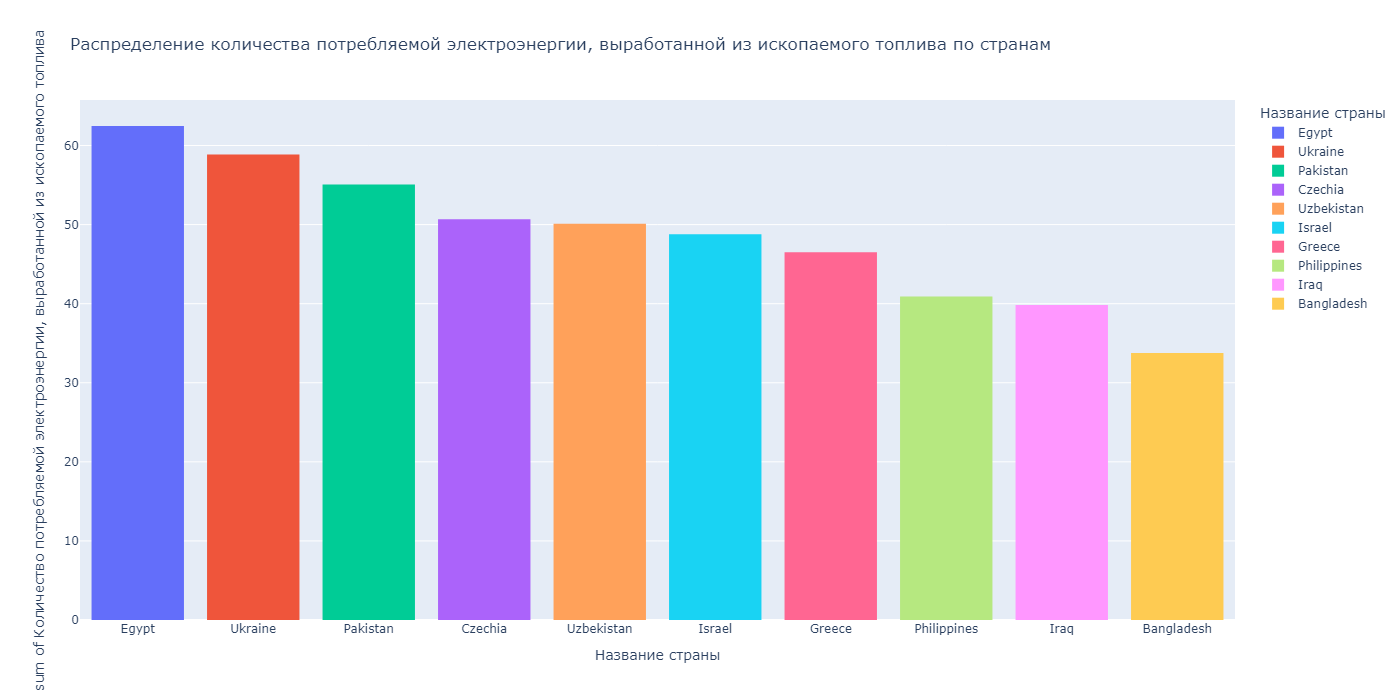

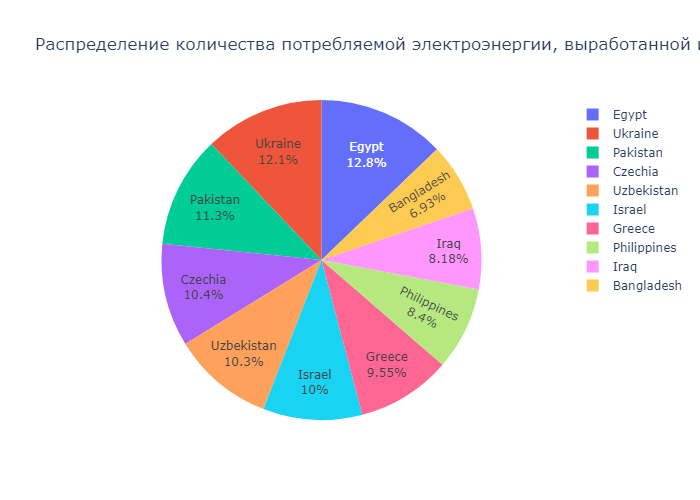

In [27]:
# Создаём DataFrame, в котором отразим зависимость потребления электроэнергии, выработанной из ископаемого топлива от страны
country_group = sustainable_energy_df.groupby(
    by = 'Entity',
    as_index = False
)['Electricity from fossil fuels (TWh)'].mean().sort_values(by = 'Electricity from fossil fuels (TWh)', ascending = False).nlargest(10, columns = ['Electricity from fossil fuels (TWh)'])

# Выводим таблицу
print('Распределение количества потребляемой электроэнергии, выработанной из ископаемого топлива по странам: \n\n{}'.format(country_group))


# Строим график
fig = px.histogram(
    data_frame = country_group,
    x = 'Entity',
    y = 'Electricity from fossil fuels (TWh)',
    color = 'Entity',
    height = 700,
    width = 1400,
    
    labels = {
        'Entity': 'Название страны',
        'Electricity from fossil fuels (TWh)': 'Количество потребляемой электроэнергии, выработанной из ископаемого топлива'
    },
    
    title = 'Распределение количества потребляемой электроэнергии, выработанной из ископаемого топлива по странам'
)

# Выводим график
fig.show('png')



# Строим круговую диаграмму
fig = px.pie(
    data_frame = country_group,
    values = 'Electricity from fossil fuels (TWh)',
    names = 'Entity',
    labels = 'Entity',
    title = 'Распределение количества потребляемой электроэнергии, выработанной из ископаемого топлива по странам'
)

# Задаём параметры графика
fig.update_traces(
    textposition = 'inside',
    textinfo = 'percent+label'
)

# Выводим график
fig.show('png')

**Вывод:**

По полученной диаграмме видно, что основным потребителем электроэнергии является **Египет** (доля потребляемой энергии равна $15.1$%), чуть ниже доля **Узбекистана** ($12.1$%), тройку замыкает **Израиль** с долей $11.8$%. 

#### $3.10$

Построим карту мира, на которой сможем визуализировать распределение потребляемой энергии по странам:

In [106]:
# Функция для нанесения объектов на карту мира
def plot_world_map(column_name):
    
    # Строим график
    fig = go.Figure()
    
    # Создаём цикл и фильтруем данные по годам
    for year in range(2000, 2021):
        filtered_df = sustainable_energy_df[sustainable_energy_df['Year'] == year]
        
        # Создаём картограмму текущего года
        trace = go.Choropleth(
            locations = filtered_df['Entity'],
            z = filtered_df[column_name],
            locationmode = 'country names',
            colorscale = 'Electric',
            colorbar = dict(title = column_name),
            zmin = sustainable_energy_df[column_name].min(),
            zmax = sustainable_energy_df[column_name].max(),
            visible = False
        )
        
        # Добавляем трассировку в график
        fig.add_trace(trace)
        
    # Делаем трассировку видимой
    fig.data[0].visible = True
    
    # Создание шагов анимации
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method = 'update',
            
            args = [
                {'visible': [False] * len(fig.data)},
                {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}
            ],
            
            label = str(2000 + i)
        )
        
        step['args'][0]['visible'][i] = True
        steps.append(step)
        
    # Создаём слайдер (ползунок)
    slider_dict = [dict(
        active = 0,
        steps = steps,
        currentvalue = {'prefix': 'Year', 'font': {'size': 14}}
    )]
    
    # Обновляем настройки макета графика
    fig.update_layout(
        title_text = f'{column_name} Map with slider',
        title_font_size = 24,
        title_x = 0.5,
        
        geo = dict(
            showframe = True,
            showcoastlines = True,
            projection_type = 'natural earth'
        ),
        
        sliders = slider_dict,
        height = 500,
        width = 1000,
        font = dict(family = 'Arial', size = 12),
        margin = dict(t = 80, l = 50, b = 50),
        template = 'plotly_dark'
    )
    
    # Выводим график
    fig.show()

Применим созданную функцию к признаку `Access to electricity (% of population)` (процент населения, имеющего доступ к электричеству):

In [107]:
# Задаём признак для визуализации
column_name = 'Access to electricity (% of population)'

# Выводим карту
plot_world_map(column_name)

Теперь визуализируем признак `Renewable energy share in total final energy consumption (%)` (процент возобновляемой энергии в конечном потреблении энергии):

In [111]:
# Задаём признак для визуализации
column_name = 'Renewable energy share in the total final energy consumption (%)'

# Выводим карту
plot_world_map(column_name)

## <CENTER> **`4.` Feature engineering (Создание новых признаков)**

На данном этапе преобразуем некоторые из признаков.

#### $4.1$ 

Преобразуем признак `Entity`.

Составим словарб, в котором ключами будут названия континентов, а значениями - страны:

In [44]:
# Создадим словарь для группировки по континентам
continent_dict = {   
                  
    "Asia": ["Afghanistan", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", 
             "Brunei", "Cambodia", "China", "Cyprus", "Georgia", 
             "India", "Indonesia", "Iran", "Iraq", "Israel", 
             "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", 
             "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", 
             "Myanmar", "Nepal", "North Korea", "Oman", "Pakistan", 
             "Palestine", "Philippines", "Qatar", "Saudi Arabia", 
             "Singapore", "South Korea", "Sri Lanka", "Syria", 
             "Tajikistan", "Thailand", "Timor-Leste", "Turkmenistan", 
             "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"],
    
    "Europe": ["Albania", "Andorra", "Austria", "Belarus", "Belgium", 
               "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", 
               "Czechia", "Denmark", "Estonia", "Finland", "France", 
               "Germany", "Greece", "Hungary", "Iceland", "Ireland", 
               "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", 
               "Moldova", "Monaco", "Montenegro", "Netherlands", 
               "North Macedonia", "Norway", "Poland", "Portugal", 
               "Romania", "San Marino", "Serbia", "Slovakia", 
               "Slovenia", "Spain", "Sweden", "Switzerland", 
               "United Kingdom"],
    
    "Africa": ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", 
               "Burundi", "Cabo Verde", "Cameroon", "Central African Republic", 
               "Chad", "Comoros", "Congo", "Djibouti", "Egypt", 
               "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", 
               "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", 
               "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", 
               "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", 
               "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", 
               "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", 
               "Sierra Leone", "Somalia", "South Africa", "South Sudan", 
               "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", 
               "Zambia", "Zimbabwe"],
    
    "North America": ["Antigua and Barbuda", "Bahamas", "Barbados", 
                      "Belize", "Canada", "Costa Rica", "Cuba", 
                      "Dominica", "Dominican Republic", "El Salvador", 
                      "Guatemala", "Haiti", "Honduras", "Jamaica", 
                      "Mexico", "Nicaragua", "Panama", "United States"],
    
    "South America": ["Argentina", "Bolivia", "Brazil", "Chile", 
                      "Colombia", "Ecuador", "Guyana", "Paraguay", 
                      "Peru", "Suriname", "Uruguay", "Venezuela"],
    
    "Oceania": ["Australia", "Fiji", "Kiribati", "Marshall Islands", 
                "Micronesia", "Nauru", "New Zealand", "Palau", 
                "Papua New Guinea", "Samoa", "Solomon Islands", 
                "Tonga", "Tuvalu", "Vanuatu"]
    
}

Преобразование:

In [45]:
# Создание функции для определения континента
def get_continent(country):
    for continent, countries in continent_dict.items():
        if country in countries:
            return continent
    return 'Unknown' 



# Примененяем созданную функцию к столбцу 'Entity'
sustainable_energy_df['Entity'] = sustainable_energy_df['Entity'].apply(get_continent)

# Вывод результата
sustainable_energy_df['Entity']

0         Asia
1         Asia
2         Asia
3         Asia
4         Asia
         ...  
3627    Africa
3628    Africa
3629    Africa
3645    Africa
3646    Africa
Name: Entity, Length: 1814, dtype: object

Теперь применим `OneHotEncoder()` для создания нескольких бинарных признаков:

In [46]:
# Создаём экземпляр класса OneHotEncoder()
OH_encoder = preprocessing.OneHotEncoder(drop = 'first')

# Создаём список признаков для обработки 
columns_to_change = ['Entity']

# Кодируем признаки
data_onehot = OH_encoder.fit_transform(sustainable_energy_df[columns_to_change]).toarray()

# Выделим названия закодированных признаков
OH_columns_names = OH_encoder.get_feature_names_out()



# Создаём новый датафрейм с закодированными признаками
data_onehot = pd.DataFrame(
    data = data_onehot,
    columns = OH_columns_names
)

# Выведем количество новых признаков
print('Количество полученных признаков: {}'.format(data_onehot.shape[1]))

Количество полученных признаков: 6


Добавим закодированные признаки в основную таблицу:

In [47]:
# Объединяем оба датафрейма
sustainable_energy_df = pd.concat(
    [sustainable_energy_df.reset_index(drop = True).drop(columns_to_change, axis = 1), data_onehot],
    axis = 1
)


# Выведем первые пять строк 
sustainable_energy_df.head()

Year  Access to electricity (% of population)  \
0  2000                                 1.613591   
1  2001                                 4.074574   
2  2002                                 9.409158   
3  2003                                14.738506   
4  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  Low-carbon electricity (% electricity)  \
0                               0.31                               65.957440   
1                               0.50                               84.745766   
2                               0.56                               81.159424   
3                               0.63                               67.021280   
4                               0.56                               62.921350   

   Primary energy consumption per capita (kWh/person)  ...  Land Area(Km2)  \
0                                          302.59482   ...        652230.0   
1                                          236.89185   ...        652230.0   
2                                          210.86215   ...        652230.0   
3                                          229.96822   ...        652230.0   
4                                          204.23125   ...        652230.0   

   Latitude  Longitude  \
0  33.93911  67.709953   
1  33.93911  67.709953   
2  33.93911  67.709953   
3  33.93911  67.709953   
4  33.93911  67.709953   

   Primary energy consumption per capita (kWh/person) log Entity_Asia  \
0                                           5.715694              1.0   
1                                           5.471816              1.0   
2                                           5.355936              1.0   
3                                           5.442280              1.0   
4                                           5.324137              1.0   

   Entity_Europe  Entity_North America  Entity_Oceania  Entity_South America  \
0            0.0                   0.0             0.0                   0.0   
1            0.0                   0.0             0.0                   0.0   
2            0.0                   0.0             0.0                   0.0   
3            0.0                   0.0             0.0                   0.0   
4            0.0                   0.0             0.0                   0.0   

   Entity_Unknown  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  

[5 rows x 25 columns]

#### $4.2$

Преобразуем признак `Year`.

Для этого воспользуемся методом `BinaryEncoder()`:

In [48]:
# Создаём экземпляр класса BinaryEncoder()
bin_encoder = ce.BinaryEncoder(cols = ['Year'])

# Кодируем признак с помощью класса BinaryEncoder()
data_binary = bin_encoder.fit_transform(sustainable_energy_df['Year'])

# Объединяем датасеты
sustainable_energy_df = pd.concat([sustainable_energy_df, data_binary], axis = 1)

# Выведем количество новых признаков
print('Количество полученных признаков: {}'.format(data_binary.shape[1]))

Количество полученных признаков: 5


#### $4.3$

Преобразуем тип признака `Density\\n(P/Km2)` в *int64*:

In [49]:
# Удаляем запятые и преобразуем строки в целые числа
sustainable_energy_df['Density\\n(P/Km2)'] = [int(item.replace(',', '')) for item in sustainable_energy_df['Density\\n(P/Km2)']]

#### $4.4$

Преобразуем признак `Electricity from nuclear (TWh)` сперва в категориальный, затем из каждой категории создадим отдельный признак.

Делаем преобразование в категориальный:

In [50]:
# Создаём функцию для присваивания каждому значению его уровень
def level_assignment(value):
    
    if value < 20:
        return 'very_low_level_(TWh)'
    elif value >= 20 and value < 40:
        return 'low_level_(TWh)'
    elif value >= 40 and value < 60:
        return 'middle_level_(TWh)'
    elif value >= 60 and value < 80:
        return 'high_level_(TWh)'
    else:
        return 'very_high_level_(TWh)'
    
    
    
# Применяем полученную функцию к признаку 'Electricity from nuclear (TWh)'
sustainable_energy_df['Electricity from nuclear (TWh)'] = sustainable_energy_df['Electricity from nuclear (TWh)'].apply(level_assignment)

Теперь применим `OneHotEncoder()` для создания нескольких бинарных признаков:

In [51]:
# Создаём экземпляр класса OneHotEncoder()
OH_encoder = preprocessing.OneHotEncoder(drop = 'first')

# Создаём список признаков для обработки 
columns_to_change = ['Electricity from nuclear (TWh)']

# Кодируем признаки
data_OH = OH_encoder.fit_transform(sustainable_energy_df[columns_to_change]).toarray()

# Выделим названия закодированных признаков
OH_columns_names = OH_encoder.get_feature_names_out()



# Создаём новый датафрейм с закодированными признаками
data_OH = pd.DataFrame(
    data = data_OH,
    columns = OH_columns_names
)

# Выведем количество новых признаков
print('Количество полученных признаков: {}'.format(data_OH.shape[1]))

Количество полученных признаков: 4


Добавим закодированные признаки в основную таблицу:

In [52]:
# Объединяем оба датафрейма
sustainable_energy_df = pd.concat(
    [sustainable_energy_df.reset_index(drop = True).drop(columns_to_change, axis = 1), data_OH],
    axis = 1
)


# Выведем первые пять строк 
sustainable_energy_df.head()

Year  Access to electricity (% of population)  \
0  2000                                 1.613591   
1  2001                                 4.074574   
2  2002                                 9.409158   
3  2003                                14.738506   
4  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from renewables (TWh)  \
0                                 0.16                               0.31   
1                                 0.09                               0.50   
2                                 0.13                               0.56   
3                                 0.31                               0.63   
4                                 0.33                               0.56   

   Low-carbon electricity (% electricity)  \
0                               65.957440   
1                               84.745766   
2                               81.159424   
3                               67.021280   
4                               62.921350   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  ...  \
0                                               1.64            ...   
1                                               1.74            ...   
2                                               1.40            ...   
3                                               1.40            ...   
4                                               1.20            ...   

   Entity_Unknown  Year_0  Year_1  Year_2  Year_3  Year_4  \
0             0.0       0       0       0       0       1   
1             0.0       0       0       0       1       0   
2             0.0       0       0       0       1       1   
3             0.0       0       0       1       0       0   
4             0.0       0       0       1       0       1   

   Electricity from nuclear (TWh)_low_level_(TWh)  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   Electricity from nuclear (TWh)_middle_level_(TWh)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   Electricity from nuclear (TWh)_very_high_level_(TWh)  \
0                                                0.0      
1                     

#### $4.5$

Удалим признаки типа `object`:

In [53]:
# Создаём список признаков типа 'object'
object_columns = [features for features in sustainable_energy_df.columns if sustainable_energy_df[features].dtype == 'object']
sustainable_energy_df.drop(object_columns, axis = 1, inplace = True)


# Выведем типипзацию признаков
sustainable_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 33 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Year                                                              1814 non-null   int64  
 1   Access to electricity (% of population)                           1814 non-null   float64
 2   Access to clean fuels for cooking                                 1814 non-null   float64
 3   Renewable-electricity-generating-capacity-per-capita              1814 non-null   float64
 4   Renewable energy share in the total final energy consumption (%)  1814 non-null   float64
 5   Electricity from fossil fuels (TWh)                               1814 non-null   float64
 6   Electricity from renewables (TWh)                                 1814 non-null   float64
 7   Low-carbon electricity (% electri

## <CENTER> **`5.` Отбор признаков**

На данном этапе проведём корреляционный анализмежду признаками, по необходимости избавимся от мультиколлинеарности, проведём нормализацию и отберём только самые информативные признаки для дальнейшего исследования.

#### $5.1$

Проводим корреляционный анализ. Построим тепловую карту корреляций признаков:

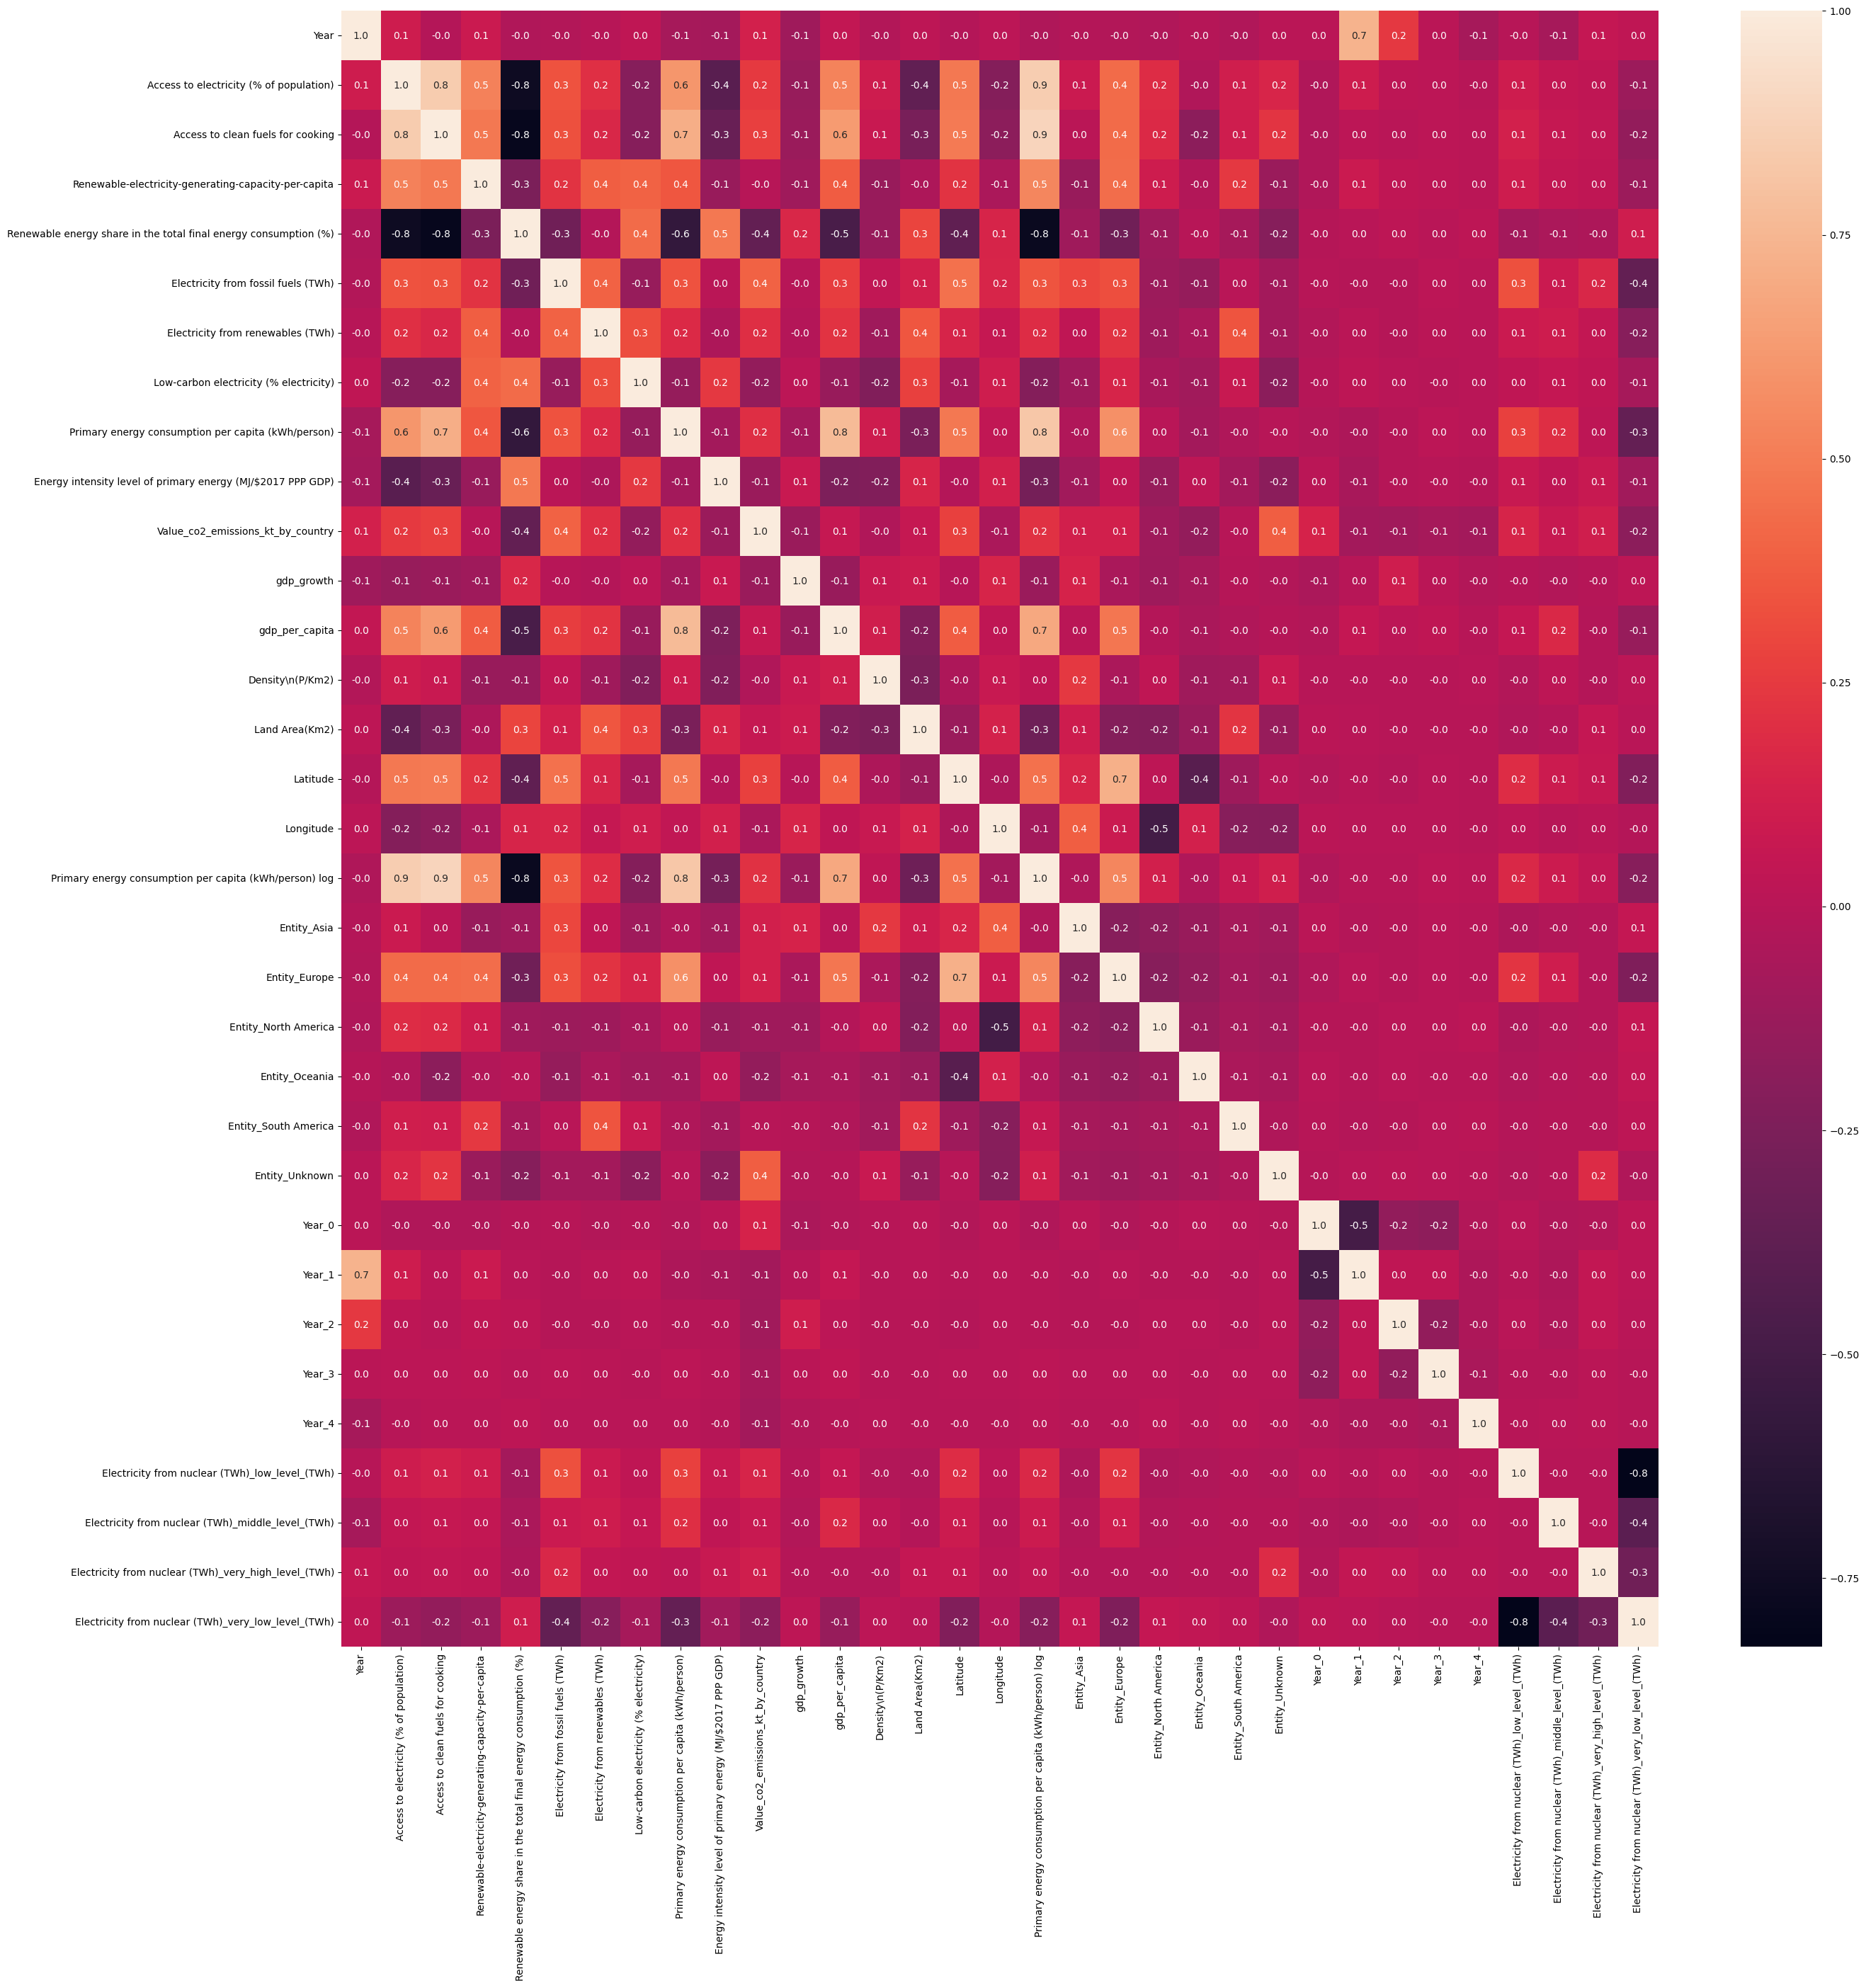

In [54]:
# Задаём параметры графика
plt.rcParams['figure.figsize'] = (30, 30)


# Строим график
sns.heatmap(
    data = sustainable_energy_df.corr(),
    annot = True,
    fmt = '.1f',
    linewidths = 0
);

**Вывод:**

Исходя из построенной тепловой карты максимальное значение корреляции доходит до 1.0. Избавимся от мультиколлинеарности.

Из данных удалим признак `Value_co2_emissions_kt_by_country`:

In [55]:
# Удаление признака
sustainable_energy_df = sustainable_energy_df.drop('Value_co2_emissions_kt_by_country', axis = 1)

# Выодим информацию
sustainable_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 32 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Year                                                              1814 non-null   int64  
 1   Access to electricity (% of population)                           1814 non-null   float64
 2   Access to clean fuels for cooking                                 1814 non-null   float64
 3   Renewable-electricity-generating-capacity-per-capita              1814 non-null   float64
 4   Renewable energy share in the total final energy consumption (%)  1814 non-null   float64
 5   Electricity from fossil fuels (TWh)                               1814 non-null   float64
 6   Electricity from renewables (TWh)                                 1814 non-null   float64
 7   Low-carbon electricity (% electri

#### $5.2$

Теперь, когда категориальные признаки предварительно обработаны, давайте сформируем матрицу наблюдения `X`, вектор целевой переменной `y` и логарифмической целевой переменной `y_log`:

In [56]:
# Матрица наблюдений X
X = sustainable_energy_df.drop(columns = ['Primary energy consumption per capita (kWh/person)', 'Primary energy consumption per capita (kWh/person) log'], axis = 1)

# Вектор правильных ответов y
y = sustainable_energy_df['Primary energy consumption per capita (kWh/person)']

# Вектор правильных ответов y_log
y_log = sustainable_energy_df['Primary energy consumption per capita (kWh/person) log']

Далее нам необходимо определить тип валидации — схему, по которой мы будем оценивать качество построенных моделей.

Разделим выборку на тренировочную (80%), валидационную (10%) и тестовую (10%):

In [57]:
# Разбиваем исходную выборку на тренировочную и валидационную в соотношении 80/20
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(X, y_log, test_size = 0.2, random_state = 42)

# Разбиваем валидационную выборку на валидационную и тестовую в соотношении 50/50
X_valid, X_test, y_valid_log, y_test_log = model_selection.train_test_split(X_valid, y_valid_log, test_size = 0.5, random_state = 42)

Выведем размерности:

In [58]:
print('Размер тренировочной выборки: {}'.format(X_train.shape))
print('Размер валидационной выборки: {}'.format(X_valid.shape))
print('Размер тестовой выборки: {}'.format(X_test.shape))

Размер тренировочной выборки: (1451, 30)
Размер валидационной выборки: (181, 30)
Размер тестовой выборки: (182, 30)


#### $5.3$

Используем алгоритм `SelectKBest` чтобы выделить 25 наиболее важных признаков для предсказания:

In [59]:
# Создаём объект класса SelectKBest()
selector = feature_selection.SelectKBest(
    score_func = feature_selection.f_regression,
    k = 25
)

# Применяем полученный объект к тренировочной выборке
selector.fit(X_train, y_train_log)

# Оставляем только выбранные признаки
important_features = selector.get_feature_names_out()
X_train = X_train[important_features]
X_valid = X_valid[important_features]

# Выведем выбранные признаки
print('При помощи объекта SelectKBest были выбраны следующие признаки:\n\n {}'.format(important_features))

При помощи объекта SelectKBest были выбраны следующие признаки:

 ['Access to electricity (% of population)'
 'Access to clean fuels for cooking'
 'Renewable-electricity-generating-capacity-per-capita'
 'Renewable energy share in the total final energy consumption (%)'
 'Electricity from fossil fuels (TWh)' 'Electricity from renewables (TWh)'
 'Low-carbon electricity (% electricity)'
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'
 'gdp_growth' 'gdp_per_capita' 'Density\\n(P/Km2)' 'Land Area(Km2)'
 'Latitude' 'Longitude' 'Entity_Asia' 'Entity_Europe'
 'Entity_North America' 'Entity_Oceania' 'Entity_South America'
 'Entity_Unknown' 'Year_0'
 'Electricity from nuclear (TWh)_low_level_(TWh)'
 'Electricity from nuclear (TWh)_middle_level_(TWh)'
 'Electricity from nuclear (TWh)_very_high_level_(TWh)'
 'Electricity from nuclear (TWh)_very_low_level_(TWh)']


#### $5.4$

Произведём нормализацию признаков при помощи алгоритма `MinMaxScaler()`, но для начала построим график распределения:

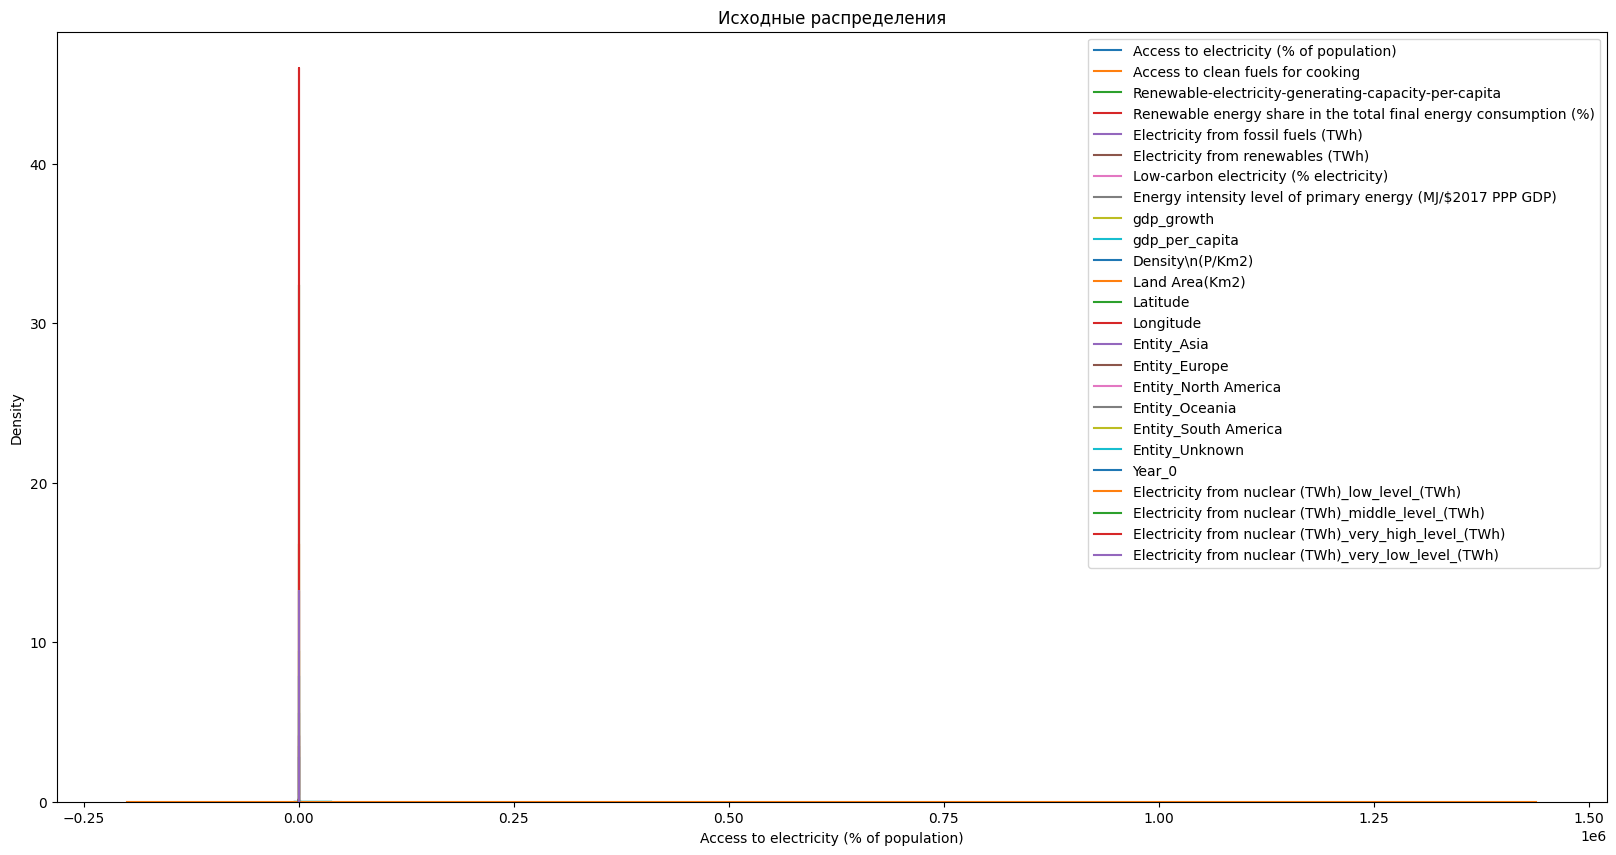

In [60]:
# Задаём параметры графика
fig, (ax) = plt.subplots(
    ncols = 1,
    figsize = (20, 10)
)

# Название графика
ax.set_title('Исходные распределения')



# Строим график
for column in X_train.columns:
    
    sns.kdeplot(
        data = X_train[column],
        ax = ax,
        label = column
    )
    
    
# Выводим график
plt.legend()

Произведём преобразование:

In [61]:
# Создаём объект MinMaxScaler()
mm_scaler = preprocessing.MinMaxScaler()

# Кодируем тренировочную и валидационную выборки
X_train = mm_scaler.fit_transform(X_train)
X_valid = mm_scaler.transform(X_valid)

# Вычислим среднее арифметическое для первого предиктора из набора.
# Ответ округлим до второго знака после точки разделителя
print('Арифметическое среднее первого предиктора из валидационной выборки: {}'.format(np.round(np.mean(X_valid[:, 0]), 2)))

# Создадим DataFrame из полученных массивов
X_train = pd.DataFrame(X_train, columns = important_features)
X_valid = pd.DataFrame(X_valid, columns = important_features)

Арифметическое среднее первого предиктора из валидационной выборки: 0.74


Выведем график после нормализации:

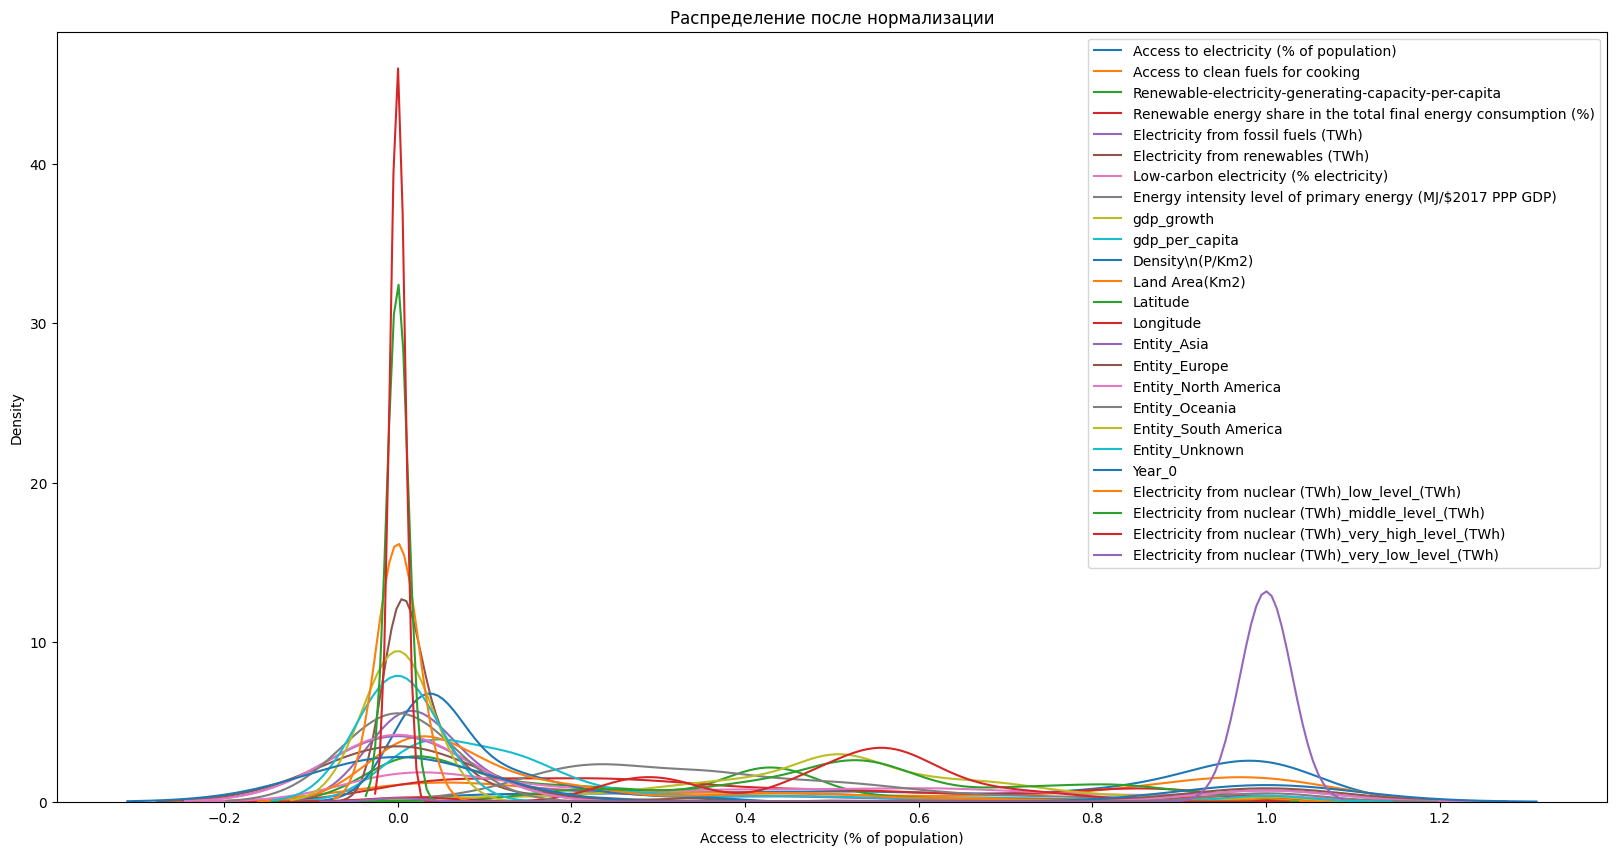

In [62]:
# Задаём параметры графика
fig, (ax) = plt.subplots(
    ncols = 1,
    figsize = (20, 10)
)

# Название графика
ax.set_title('Распределение после нормализации')



# Строим график
for column in X_train.columns:
    
    sns.kdeplot(
        data = X_train[column],
        ax = ax,
        label = column
    )
       
    
# Выводим график
plt.legend()

## <CENTER> **`6.` Machine Learning**

На данном этапе мы построим несколько подходящих моделей и выявим наилучшую.

#### $6.1$

### **AutoML**

Первой моделью будет `LightAutoML`.

Разделим данные:

In [40]:
# Составляем список факторов (исключили целевой столбец)
features = sustainable_energy_df.drop('Primary energy consumption per capita (kWh/person)', axis = 1).columns

# Составляем матрицу наблюдений X, вектор правильных ответов y и логарифмированный вектор правильных ответов y_log
X = sustainable_energy_df[features]
y = sustainable_energy_df['Primary energy consumption per capita (kWh/person)']
y_log = sustainable_energy_df['Primary energy consumption per capita (kWh/person) log']

Определяем константы (количество потоков, таймаут, имя целевой колонки, размер валидационной выборки и так далее):

In [41]:
# Опредиляем константы для lightautoml
N_THREADS = 10
N_FOLDS = 10
RANDOM_STATE = 42
TEST_SIZE = 0.33
TIMEOUT = 600
TARGET_NAME = 'Primary energy consumption per capita (kWh/person) log'

Для максимальной воспроизводимости решения используем команды:

In [42]:
np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

Разбиваем данные на тренировочную (**80%, train_data**) и валидационную (**20%, test_data**) выборки:

In [43]:
train_df, test_df = model_selection.train_test_split(
    X,
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE
)

# Выведем размеры тренировочной и тестовой части
print(f'Данные разделены. Размеры каждой части: train_data = {train_df.shape}, test_data = {test_df.shape}')

Данные разделены. Размеры каждой части: train_data = (1215, 31), test_data = (599, 31)


Указываем задачу, которую решаем (задача регрессии **reg**) и указываем метрику (**mae**):

In [44]:
task = Task(
    'reg',
    loss = 'mae',
    metric = 'mae'
)

Указываем роли переменных:

In [45]:
roles = {
    'target': TARGET_NAME,
    'drop': []
}

С помощью класса **TabularAutoML** создаём модель **LightAutoML**:

In [46]:
automl = TabularAutoML(
    task = task,
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    
    reader_params = {
        'n_jobs': N_THREADS,
        'cv': N_FOLDS,
        'random_state': RANDOM_STATE
    }
    
)

Обучение тренировочной выборки:

In [47]:
oof_pred = automl.fit_predict(
    train_data = train_df,
    roles = roles,
    verbose = 1
)

[10:39:07] Stdout logging level is INFO.
[10:39:07] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
[10:39:07] Task: reg

[10:39:07] Start automl preset with listed constraints:
[10:39:07] - time: 600.00 seconds
[10:39:07] - CPU: 10 cores
[10:39:07] - memory: 16 GB

[10:39:07] Train data shape: (1215, 31)

[10:39:13] Layer 1 train process start. Time left 593.73 secs
[10:39:13] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[10:39:19] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -0.2183490223580408
[10:39:19] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[10:39:19] Time left 587.65 secs

[10:39:22] Selector_LightGBM fitting and predicting completed
[10:39:22] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[10:39:45] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -0.10639886404685393
[10:39:45] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[10:39:45] Start hyperparameters optimization for Lvl_

In [48]:
# Выводим информацию об автоматической обработке
print(automl.create_model_str_desc())

Final prediction for new objects (level 0) = 
	 0.55866 * (10 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.44134 * (10 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) 


С помощью метода **fast** построим график, на котором отобразим оценку влияния каждого признака на полученные предсказания:

<Axes: xlabel='Feature'>

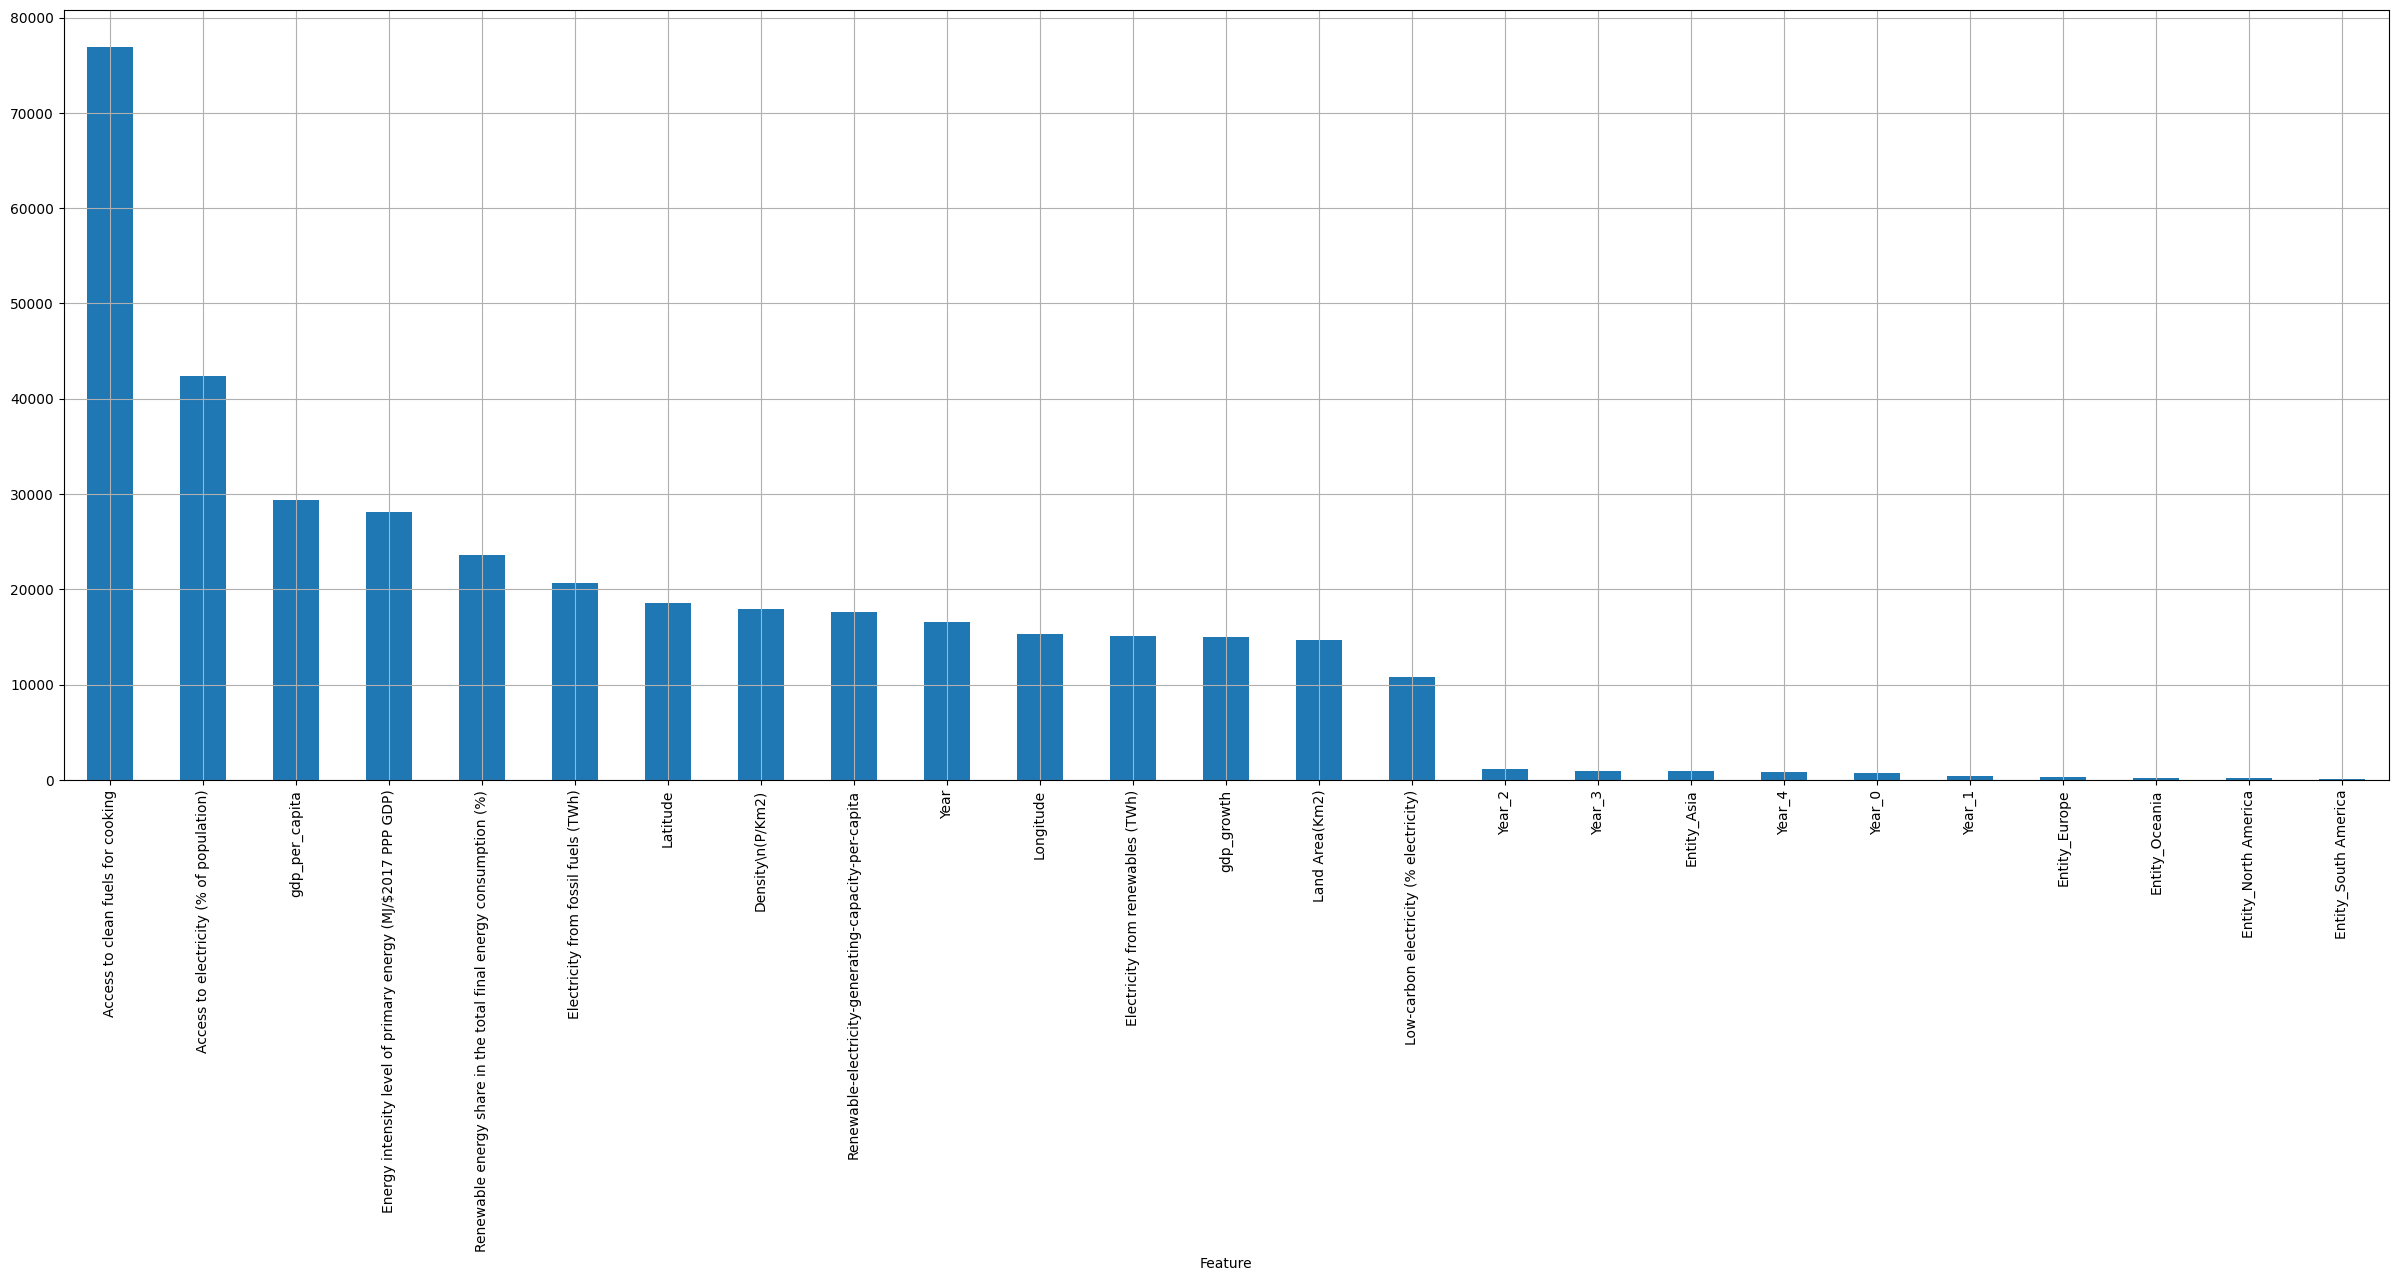

In [49]:
fast_fi = automl.get_feature_scores('fast')

# Строим график
fast_fi.set_index('Feature')['Importance'].plot.bar(
    figsize = (30, 10),
    grid = True
)

Обучение валидационной выборки:

In [50]:
test_pred = automl.predict(test_df)
print(f'Предсказание для test_df:\n{test_pred}\nShape = {test_pred.shape}')

Предсказание для test_df:
array([[ 6.3483877],
       [10.007597 ],
       [ 8.697107 ],
       [ 9.566338 ],
       [10.183117 ],
       [10.715858 ],
       [ 7.7524767],
       [ 9.867853 ],
       [ 5.9835176],
       [ 8.102964 ],
       [ 8.504324 ],
       [ 6.535346 ],
       [ 9.599703 ],
       [ 9.709539 ],
       [ 5.7778187],
       [ 9.505205 ],
       [ 9.644165 ],
       [10.303621 ],
       [ 7.7324905],
       [ 7.6845784],
       [ 6.40715  ],
       [10.795589 ],
       [ 7.9074993],
       [ 7.1268535],
       [ 9.241562 ],
       [ 6.889035 ],
       [ 7.632328 ],
       [ 6.517722 ],
       [ 6.9905887],
       [ 8.471347 ],
       [ 8.10178  ],
       [ 6.59479  ],
       [11.127636 ],
       [ 6.377486 ],
       [ 9.235019 ],
       [10.402536 ],
       [ 7.135142 ],
       [ 7.73892  ],
       [ 9.167904 ],
       [ 8.850297 ],
       [ 9.650879 ],
       [ 9.460802 ],
       [ 6.8227415],
       [ 8.033501 ],
       [ 9.887152 ],
       [ 8.945865 ],
       [

In [51]:
# Сравниваем предсказанные значения (test_pred) с реальными (test_data), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.
print('RMSLE: {:.4F}'.format(np.sqrt(metrics.mean_squared_error(test_df[TARGET_NAME].values, test_pred.data[:, 0]))))
print('MAPE: {:.4f}'.format(metrics.mean_absolute_percentage_error(test_df[TARGET_NAME].values, test_pred.data[:, 0])))

RMSLE: 0.1499
MAPE: 0.0110


**Вывод:**

Модель демонстрирует высокую точность прогнозирования, так как обе метрики ($RMSLE = 15$% и $MAPE - 1.1$%) имеют низкие значения. Это означает, что предсказанные значения модели близки к реальным данным.

#### $6.2$

### **Linear Regression (Линейная регрессия)**

Определим метрику, с помощью которой мы будем измерять качество наших моделей. В качестве показателя возьмем **RMSLE (Root Mean Squared Log Error)** которая расчитывается по следующей формуле:

$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$

где:

* $y_i$ - стоимость $i$-й квартиры (`target`);
* $\hat{y_i}$ - предсказанная стоимость $i$-й квартиры.


Так как мы уже взяли логарифм целевой переменной, нам будет достаточно вычислить метрику *RMSLE* для модели, обученной прогнозировать стоимость жилья в логарифмическом масштабе:

$$z_i=log(y_i+1),$$

$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$

* Построим линейную регрессию на тренировочной выборке (используем целевую переменную в логарифмическом масштабе), при этом оставим все параметры без изменения.

Для полученной модели подсчитаем метрику *RMSLE* на тренировочной и валидационной выборке. Ответ **округлим до второго знака полсе точки разделителя**:

In [64]:
# Создаём объект класса LinearRegression()
LR_model = linear_model.LinearRegression()

# Обучаем модель
LR_model.fit(X_train, y_train_log)

# Делаем предсказания на тренировочной, валидационной и тестовой выборках
y_train_predict = LR_model.predict(X_train)
y_valid_predict = LR_model.predict(X_valid)



# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

RMSLE на тренировочной выборке: 0.42
RMSLE на валидационной выборке: 0.45

MAPE на тренировочной выборке: 0.04
MAPE на валидационной выборке: 0.04


* Сгенерируем полиномиальные признаки второй степени, используя `PolynomialFeatures` из библиотеки *sklearn*. Возьмем `False` в качестве значения параметра `include_bias`.

Затем мы построим модель полиномиальной регрессии второй степени на обучающем наборе. Все параметры оставим по умолчанию.

Для полученной модели вычислим метрику *RMSLE* на обучающем и валидационном наборах. Ответ **округлим до второго знака после запятой**:

In [65]:
# Создаём генератор полиномиальных признаков PolynomialFeatures()
poly_features = preprocessing.PolynomialFeatures(
    degree = 2,
    include_bias = False
)

# Обучаем модель PolynomialFeatures()
poly_features.fit(X_train)



# Генерируем полиномиальные признаки на тренировочной и тестовой наборах данных
X_train_poly = poly_features.transform(X_train)
X_valid_poly = poly_features.transform(X_valid)



# Создаём объект класса LinearRegression()
LR_model_poly = linear_model.LinearRegression()

# Обучаем модель
LR_model_poly.fit(X_train_poly, y_train_log)

# Делаем предсказание для обучающей и валидационной выборок
y_train_predict = LR_model_poly.predict(X_train_poly)
y_valid_predict = LR_model_poly.predict(X_valid_poly)

# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

RMSLE на тренировочной выборке: 0.18
RMSLE на валидационной выборке: 4224734803.68

MAPE на тренировочной выборке: 0.02
MAPE на валидационной выборке: 31298372.91


**Вывод:**

Метрики показывают, что модель сильно переобучена:

1. Ошибки на тренировочной выборке очень низкие, что говорит о том, что модель хорошо обучилась на тренировочных данных;
2. Ошибки на валидационной выборке чрезвычайно высокие, что указывает на низкую способность модели обобщать данные на новых примерах.

* Построим модель полиномиальной регрессии второй степени с $L_2$-регуляризацией (регуляризацией Тихонова) на обучающем наборе. Коэффициент регуляризации вычислим с помощью `GridSearchCV()`, остальные параметры оставим по умолчанию.

Для полученной модели мы вычисляем метрики *RMSLE* и *MAPE* на обучающем и проверочном наборах. Ответ **округлим до второго знака после запятой**:

In [66]:
# Создаём объекта класса линейной регрессии с L2-регуляризацией
LR_model_ridge = linear_model.Ridge()


# Определение пространства поиска гиперпараметров
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}


# Выполнение перебора гиперпараметров с помощью GridSearchCV
grid_search = model_selection.GridSearchCV(
    estimator = LR_model_ridge,
    param_grid = param_grid,
    cv = 3,
    verbose = 2,
    n_jobs = -1
)


# Обучаем модель 
grid_search.fit(X_train_poly, y_train_log)

# Делаем предсказание для обучающей и валидационной выборок
y_train_predict = grid_search.predict(X_train_poly)
y_valid_predict = grid_search.predict(X_valid_poly)



# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

print()


# Сохраним полученные гиперпараметры в переменной
best_parameters = grid_search.best_params_

# Выведем наилучшие значения гиперпараметров
print(f'Наилучшие значения гиперпараметров: {best_parameters}')

Fitting 3 folds for each of 4 candidates, totalling 12 fits
RMSLE на тренировочной выборке: 0.23
RMSLE на валидационной выборке: 0.23

MAPE на тренировочной выборке: 0.02
MAPE на валидационной выборке: 0.02

Наилучшие значения гиперпараметров: {'alpha': 0.1}


Обучим модель **Ridge()** на полученных параметрах:

In [67]:
# Создаём объекта класса линейной регрессии с L2-регуляризацией
LR_model_ridge = linear_model.Ridge(**best_parameters)

# Обучаем модель
LR_model_ridge.fit(X_train_poly, y_train_log)

# Делаем предсказание для обучающей и валидационной выборок
y_train_predict = LR_model_ridge.predict(X_train_poly)
y_valid_predict = LR_model_ridge.predict(X_valid_poly)

# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

RMSLE на тренировочной выборке: 0.23
RMSLE на валидационной выборке: 0.23

MAPE на тренировочной выборке: 0.02
MAPE на валидационной выборке: 0.02


#### $6.3$

### **Decision Tree Regression (Решающие деревья)**

Теперь попробуем построить модель дерева решений (**DecisionTreeRegressor**) на обучающем наборе. Все параметры оставим по умолчанию, но установим значение параметра `random_state = 42`.

Для полученной модели мы вычисляем метрику *RMSLE* на обучающем и валидационном наборах. Ответ **округлим до второго знака после запятой**:

In [68]:
# Создаём объекта класса DecisionTreeRegressor()
DT_Regression = tree.DecisionTreeRegressor(random_state = 42)

# Обучаем модель
DT_Regression.fit(X_train_poly, y_train_log)

# Делаем предсказание для обучающей и валидационной выборок
y_train_predict = DT_Regression.predict(X_train_poly)
y_valid_predict = DT_Regression.predict(X_valid_poly)



# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

RMSLE на тренировочной выборке: 0.00
RMSLE на валидационной выборке: 0.16

MAPE на тренировочной выборке: 0.00
MAPE на валидационной выборке: 0.01


* Переберём комбинаций различных параметров и выберем тот вариант, при котором модель будет давать наиболее точный прогноз.

Организуем перебор при помощи **RandomizedSearchCV()**:

In [69]:
# Определение пространства поиска
param_dist = {
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['friedman_mse', 'squared_error', 'poisson', 'absolute_error'],
    'splitter': ['best', 'random']
}


# Производим поиск
random_search = model_selection.RandomizedSearchCV(
    estimator = DT_Regression,
    param_distributions = param_dist,
    n_iter = 100,
    cv = 3,
    verbose = 2,
    random_state = 42
)


# Обучаем модель 
random_search.fit(X_train_poly, y_train_log)

# Делаем предсказание для обучающей и валидационной выборок
y_train_predict = random_search.predict(X_train_poly)
y_valid_predict = random_search.predict(X_valid_poly)



# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

print()


# Сохраним полученные гиперпараметры в переменной
best_parameters = random_search.best_params_

# Выведем наилучшие значения гиперпараметров
print(f'Наилучшие значения гиперпараметров: {best_parameters}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=1

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


90 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py",

Обучим модель **DecisionTreeRegressor()** на полученных параметрах:

In [70]:
# Применение наилучших гиперпараметров к модели
DT_Regression = tree.DecisionTreeRegressor(**best_parameters)

# Обучаем модель
DT_Regression.fit(X_train_poly, y_train_log)

# Делаем предсказание для обучающей и валидационной выборок
y_train_predict = DT_Regression.predict(X_train_poly)
y_valid_predict = DT_Regression.predict(X_valid_poly)



# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

RMSLE на тренировочной выборке: 0.04
RMSLE на валидационной выборке: 0.41

MAPE на тренировочной выборке: 0.00
MAPE на валидационной выборке: 0.02


Теперь организуем перебор при помощи **GridSearchCV()**:

In [71]:
# Создаём объекта класса DecisionTreeRegressor()
DT_Regression = tree.DecisionTreeRegressor(random_state = 42)


# Определение параметров для поиска
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['poisson', 'absolute_error', 'friedman_mse', 'squared_error']
}


# Производим поиск
grid_search = model_selection.GridSearchCV(
    estimator = DT_Regression,
    param_grid = param_grid,
    cv = 3,
    verbose = 2,
    n_jobs = -1
)


# Обучаем модель 
grid_search.fit(X_train_poly, y_train_log)

# Делаем предсказание для обучающей и валидационной выборок
y_train_predict = grid_search.predict(X_train_poly)
y_valid_predict = grid_search.predict(X_valid_poly)



# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

print()


# Сохраним полученные гиперпараметры в переменной
best_parameters = grid_search.best_params_

# Выведем наилучшие значения гиперпараметров
print(f'Наилучшие значения гиперпараметров: {best_parameters}')

Fitting 3 folds for each of 128 candidates, totalling 384 fits
RMSLE на тренировочной выборке: 0.08
RMSLE на валидационной выборке: 0.18

MAPE на тренировочной выборке: 0.00
MAPE на валидационной выборке: 0.01

Наилучшие значения гиперпараметров: {'criterion': 'poisson', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


192 fits failed out of a total of 384.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
132 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

Обучим модель **DecisionTreeRegressor()** на полученных параметрах:

In [72]:
# Применение наилучших гиперпараметров к модели
DT_Regression = tree.DecisionTreeRegressor(**best_parameters)

# Обучаем модель
DT_Regression.fit(X_train_poly, y_train_log)

# Делаем предсказание для обучающей и валидационной выборок
y_train_predict = DT_Regression.predict(X_train_poly)
y_valid_predict = DT_Regression.predict(X_valid_poly)



# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

RMSLE на тренировочной выборке: 0.06
RMSLE на валидационной выборке: 0.29

MAPE на тренировочной выборке: 0.00
MAPE на валидационной выборке: 0.02


**Вывод:**

* Модель показывает практически идеальные результаты на тренировочной выборке (ошибки близки к нулю), что может свидетельствовать о возможном переобучении;

* На валидационной выборке ошибки также очень низкие ($RMSLE = 0.20$, $MAPE = 0.01$), что говорит о хорошем качестве модели.

Перебираем все возможные варианты глубины дерева решений. Построим линейные графики изменения метрики *RMSLE* на обучающей и проверочной выборках в зависимости от значения параметра глубины дерева решений.

Для полученной модели мы вычисляем метрику *RMSLE* на обучающем и валидационном наборах. Ответ **округлим до второго знака после запятой**:

Оптимальная глубина дерева решений: 13
RMSLE на тренировочной выборке: 0.03
RMSLE на валидационной выборке: 0.15


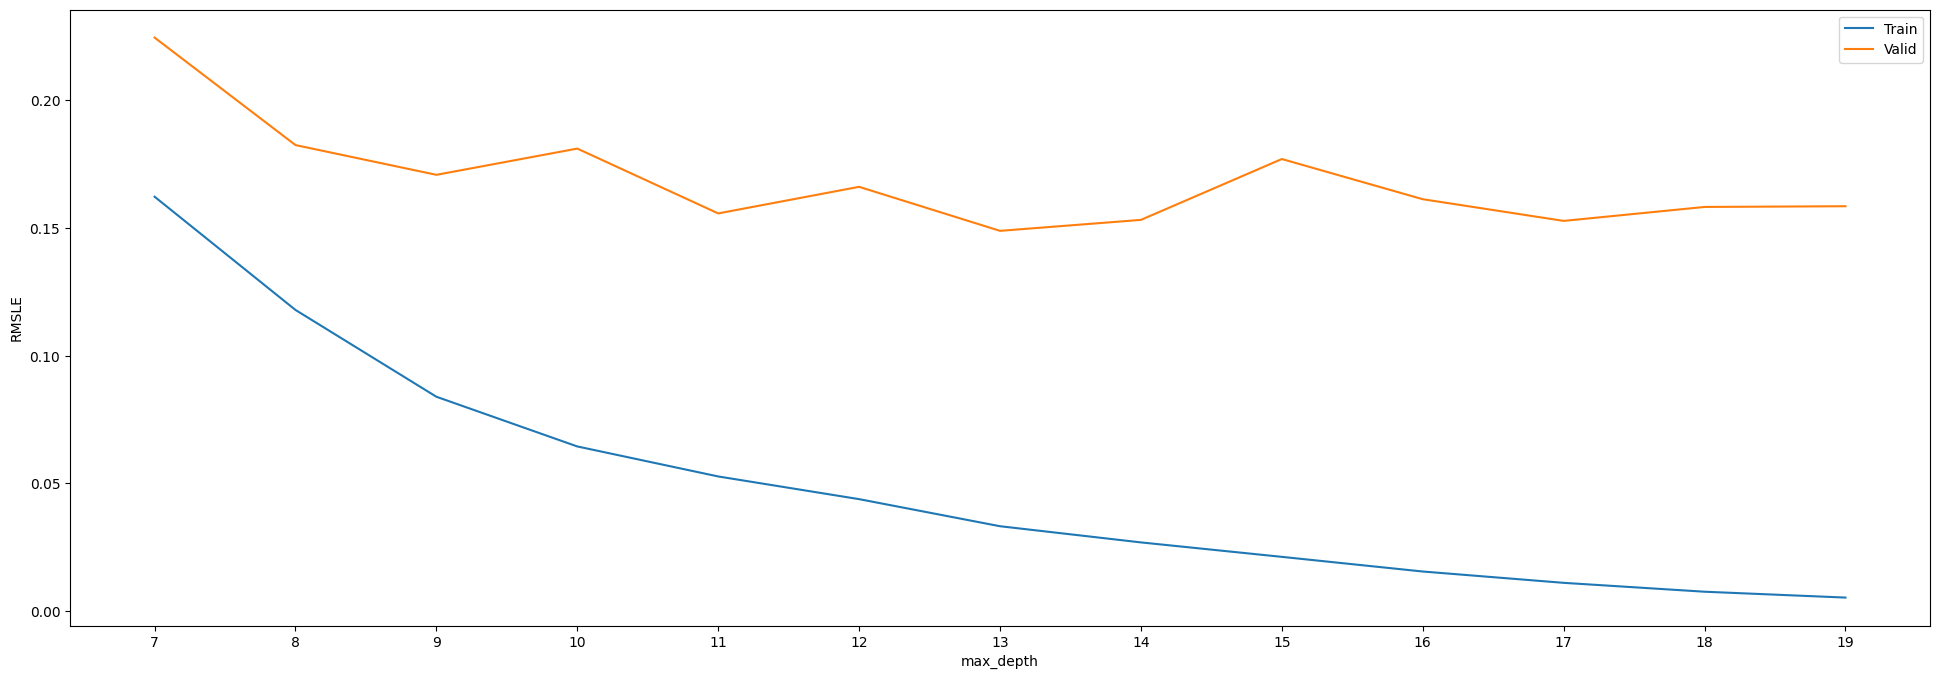

In [73]:
# Создаём диапазон значений от 7 до 20
max_depth_list = range(7, 20)



# Создаём пустые списки для значений глубины для обоих наборов
train_depth_values = []
valid_depth_values = []



# Создаём цикл для перебора значений
for value in max_depth_list:
    
    # Создаём объекта класса DecisionTreeRegressor()
    DT_Regression = tree.DecisionTreeRegressor(
        max_depth = value,
        random_state = 42
    )
    
    # Обучаем модель
    DT_Regression.fit(X_train_poly, y_train_log)
    
    # Делаем предсказание для обучающей и валидационной выборок
    y_train_predict = DT_Regression.predict(X_train_poly)
    y_valid_predict = DT_Regression.predict(X_valid_poly)
    
    # Считаем и выводим метрику RMSLE
    train_depth_values.append(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict)))
    valid_depth_values.append(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict)))
    
    
    
# Построение линейных графиков метрик RMSLE
fig, ax = plt.subplots(figsize = (24, 8))
ax.plot(max_depth_list, train_depth_values, label = 'Train')
ax.plot(max_depth_list, valid_depth_values, label = 'Valid')
ax.set_xlabel('max_depth')
ax.set_ylabel('RMSLE')
ax.set_xticks(max_depth_list)
ax.legend();

# Извлекаем индекс лучшего RMSLE в наборе проверки
best_index = valid_depth_values.index(min(valid_depth_values))
print('Оптимальная глубина дерева решений: {}'.format(max_depth_list[best_index], 2))
print('RMSLE на тренировочной выборке: {}'.format(round(train_depth_values[best_index], 2)))
print('RMSLE на валидационной выборке: {}'.format(round(valid_depth_values[best_index], 2)))

**Вывод:**

Исходя из полученных рассчётов и графика, оптимальная глубина дерева (13) обеспечивает баланс между переобучением и недообучением, минимизируя ошибку на валидационной выборке.

### $6.4$

#### **Random Forest Regression (Случайный лес)**


Построим модель случайного леса на тренировочной выборке. Зададим следующие гиперпараметры:

* `n_estimators` = 200;

* `max_depth` = 14;

* `criterion` = 'squared_error';

* `min_samples_split` = 20;

* `random_state` = 42.

Для полученной модели рассчитаем метрику *RMSLE* на тренировочной и валидационной выборках. Ответ округлим до **второго знака после точки разделителя**:

In [74]:
# Создаем объект класса RandomForestRegressor()
RF_Regression = ensemble.RandomForestRegressor(
    
    n_estimators = 200,
    max_depth = 14,
    criterion = 'squared_error',
    min_samples_split = 20,
    random_state = 42
    
)

# Обучаем модель на тренировочной выборке
RF_Regression.fit(X_train_poly, y_train_log)

# Делаем предсказание на тренировочной и валидационной выборке
y_train_predict = RF_Regression.predict(X_train_poly)
y_valid_predict = RF_Regression.predict(X_valid_poly)



# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

RMSLE на тренировочной выборке: 0.12
RMSLE на валидационной выборке: 0.16

MAPE на тренировочной выборке: 0.01
MAPE на валидационной выборке: 0.01


* Переберём комбинаций различных параметров и выберем тот вариант, при котором модель будет давать наиболее точный прогноз.

Организуем перебор при помощи **RandomizedSearchCV()**:

In [75]:
# Определение пространства поиска
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


# Производим поиск
random_search = model_selection.RandomizedSearchCV(
    estimator = RF_Regression,
    param_distributions = param_dist,
    n_iter = 100,
    cv = 3,
    verbose = 2,
    random_state = 42
)


# Обучаем модель 
random_search.fit(X_train_poly, y_train_log)

# Делаем предсказание для обучающей и валидационной выборок
y_train_predict = random_search.predict(X_train_poly)
y_valid_predict = random_search.predict(X_valid_poly)



# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

print()


# Сохраним полученные гиперпараметры в переменной
best_parameters = random_search.best_params_

# Выведем наилучшие значения гиперпараметров
print(f'Наилучшие значения гиперпараметров: {best_parameters}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_e

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


96 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py",

RMSLE на тренировочной выборке: 0.06
RMSLE на валидационной выборке: 0.13

MAPE на тренировочной выборке: 0.00
MAPE на валидационной выборке: 0.01

Наилучшие значения гиперпараметров: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


Обучим модель **RandomForestRegressor()** на полученных параметрах:

In [76]:
# Применение наилучших гиперпараметров к модели
RF_Regression = ensemble.RandomForestRegressor(**best_parameters)

# Обучаем модель
RF_Regression.fit(X_train_poly, y_train_log)

# Делаем предсказание для обучающей и валидационной выборок
y_train_predict = RF_Regression.predict(X_train_poly)
y_valid_predict = RF_Regression.predict(X_valid_poly)



# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

RMSLE на тренировочной выборке: 0.06
RMSLE на валидационной выборке: 0.14

MAPE на тренировочной выборке: 0.00
MAPE на валидационной выборке: 0.01


Теперь организуем перебор при помощи **GridSearchCV()**:

In [77]:
# Создаем объект класса RandomForestRegressor()
RF_Regression = ensemble.RandomForestRegressor(random_state = 42)


# Определение параметров для поиска
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


# Производим поиск
grid_search = model_selection.GridSearchCV(
    estimator = RF_Regression,
    param_grid = param_grid,
    cv = 3,
    verbose = 2,
    n_jobs = -1
)


# Обучаем модель 
grid_search.fit(X_train_poly, y_train_log)

# Делаем предсказание для обучающей и валидационной выборок
y_train_predict = grid_search.predict(X_train_poly)
y_valid_predict = grid_search.predict(X_valid_poly)



# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

print()


# Сохраним полученные гиперпараметры в переменной
best_parameters = grid_search.best_params_

# Выведем наилучшие значения гиперпараметров
print(f'Наилучшие значения гиперпараметров: {best_parameters}')

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
309 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.p

RMSLE на тренировочной выборке: 0.05
RMSLE на валидационной выборке: 0.13

MAPE на тренировочной выборке: 0.00
MAPE на валидационной выборке: 0.01

Наилучшие значения гиперпараметров: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


Обучим модель **RandomForestRegressor()** на полученных параметрах:

In [78]:
# Применение наилучших гиперпараметров к модели
RF_Regression = ensemble.RandomForestRegressor(**best_parameters)

# Обучаем модель
RF_Regression.fit(X_train_poly, y_train_log)

# Делаем предсказание для обучающей и валидационной выборок
y_train_predict = RF_Regression.predict(X_train_poly)
y_valid_predict = RF_Regression.predict(X_valid_poly)



# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

RMSLE на тренировочной выборке: 0.05
RMSLE на валидационной выборке: 0.13

MAPE на тренировочной выборке: 0.00
MAPE на валидационной выборке: 0.01


### $6.5$

#### **Gradient Boosting Regression (Градиентный бустинг)**

Построим модель градиентного бустинга для задачи регрессии (`GradientBoostingRegressor()`) на тренировочной выборке. Но для начала, организуем перебор гиперпараметров с помощью модели `GridSearchCV()`для получения лучших параметров:

In [79]:
# Создаем объект класса GradientBoostingRegressor()
GB_Regressor = ensemble.GradientBoostingRegressor(random_state = 42)


# Определение параметров для поиска
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}


# Выполнение перебора гиперпараметров с помощью GridSearchCV
grid_search = model_selection.GridSearchCV(
    estimator = GB_Regressor,
    param_grid = param_grid,
    cv = 3,
    verbose = 2,
    n_jobs = -1
)


# Обучаем модель 
grid_search.fit(X_train_poly, y_train_log)

# Делаем предсказание для обучающей и валидационной выборок
y_train_predict = grid_search.predict(X_train_poly)
y_valid_predict = grid_search.predict(X_valid_poly)



# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

print()


# Сохраним полученные гиперпараметры в переменной
best_parameters = grid_search.best_params_

# Выведем наилучшие значения гиперпараметров
print(f'Наилучшие значения гиперпараметров: {best_parameters}')

Fitting 3 folds for each of 81 candidates, totalling 243 fits
RMSLE на тренировочной выборке: 0.03
RMSLE на валидационной выборке: 0.13

MAPE на тренировочной выборке: 0.00
MAPE на валидационной выборке: 0.01

Наилучшие значения гиперпараметров: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 150}


Обучим модель **GradientBoostingRegressor()** на полученных параметрах:

In [80]:
# Применение наилучших гиперпараметров к модели
GB_Regressor = ensemble.GradientBoostingRegressor(**best_parameters)

# Обучаем модель
GB_Regressor.fit(X_train, y_train_log)

# Делаем предсказание для обучающей и валидационной выборок
y_train_predict = GB_Regressor.predict(X_train)
y_valid_predict = GB_Regressor.predict(X_valid)



# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

RMSLE на тренировочной выборке: 0.05
RMSLE на валидационной выборке: 0.12

MAPE на тренировочной выборке: 0.00
MAPE на валидационной выборке: 0.01


Построим столбчатую диаграмму, на которой отобразим важность каждого признака:

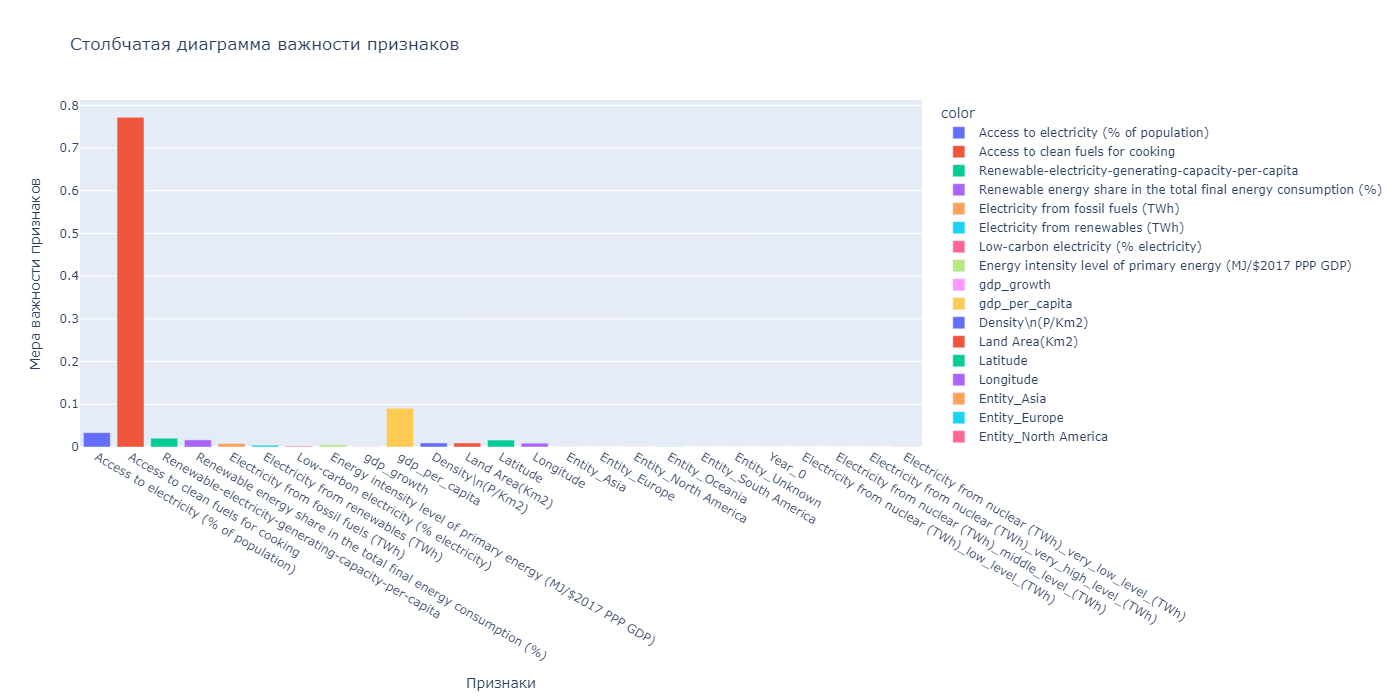

In [81]:
# Задаем параметры графика
features = X_train.columns
features_importances = GB_Regressor.feature_importances_


# Строим график
fig = px.bar(
    x = features,
    y = features_importances,
    color = features,
    orientation = 'v',
    height = 700,
    width = 1400,
    
    labels = {
        'x': 'Признаки',
        'y': 'Мера важности признаков'
    },
    
    title = 'Столбчатая диаграмма важности признаков'
)

# Выводим график
fig.show('png')

**Вывод:**

Из полученного графика видно, что самым важным признаком для предсказания целевой переменной является `Access to clean fuels for cooking` (процент населения, в основном использующего чистые виды топлива).

### $6.6$

#### **Stacking Regression (Стеккинг)**

Построим ансамбль из следующих моделей: `Ridge`, `DecisionTreeRegressor`, `RandomForestRegressor` и `GradientBoostingRegressor`. В качестве метамодели используем модель линейной регрессии с $L_2$-регуляризацией.

Воспользуемся **стекингом**:

In [82]:
# Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    
    ('R_Regressor', linear_model.Ridge(alpha = 1)),
    
    ('DT_Regressor', tree.DecisionTreeRegressor(
        splitter = 'best',
        min_samples_split = 5,
        min_samples_leaf = 1,
        max_features = 'log2',
        max_depth = 15,
        criterion = 'absolute_error'
    )),
    
    ('RF_Regressor', ensemble.RandomForestRegressor(
        max_depth = None,
        max_features = 'sqrt',
        min_samples_leaf = 1,
        min_samples_split = 2,
        n_estimators = 500
    )),
    
    ('GB_Regressor', ensemble.GradientBoostingRegressor(
        learning_rate = 0.1,
        max_depth = 5,
        min_samples_split = 2,
        n_estimators = 150
    ))
    
]


# Создаем объект класса стекинг
ST_Regressor = ensemble.StackingRegressor(
    estimators = estimators,
    final_estimator = linear_model.Ridge()
)



# Обучаем модель
ST_Regressor.fit(X_train_poly, y_train_log)

# Делаем предсказание для обучающей и валидационной выборок
y_train_predict = ST_Regressor.predict(X_train_poly)
y_valid_predict = ST_Regressor.predict(X_valid_poly)



# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

RMSLE на тренировочной выборке: 0.03
RMSLE на валидационной выборке: 0.12

MAPE на тренировочной выборке: 0.00
MAPE на валидационной выборке: 0.01


### $6.7$

#### **XGBRegressor**

Построим модель `XGBRegressor()` для задачи регрессии на тренировочной выборке. 

Оптимизируем гиперпараметры при поиощи **Optuna**:

In [83]:
# Фиксируем значение random_state
random_state = 42



# Создаём функцию для оптимизации гиперпараметров
def optuna_xgb(trial):
    
    # Задаем пространства поиска гиперпараметров
    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'objective': 'reg:squarederror',
        'verbosity': 0
    }
    
    
    # Cоздаем модель и обучаем её
    XGB_Regressor = XGBRegressor(**params)
    XGB_Regressor.fit(X_train_poly, y_train_log)
    
    # Делаем предсказание для обучающей и валидационной выборок
    y_valid_predict = XGB_Regressor.predict(X_valid_poly)
    
    # Считаем и выводим метрику RMSLE
    rmsle_scorer = np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))
    
    return rmsle_scorer



# Cоздаем объект исследования
study = optuna.create_study(
    study_name = 'XGBRegressor',
    direction = 'minimize'
)


# Ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_xgb, n_trials = 100)

# Сохраним полученные гиперпараметры в переменной
best_parameters = study.best_params


# Выводим результаты на валидационной выборке
print('RMSLE на валидационной выборке: {:.2f}'.format(study.best_value))
print(f'Наилучшие значения гиперпараметров: {best_parameters}')

RMSLE на валидационной выборке: 0.10
Наилучшие значения гиперпараметров: {'booster': 'gbtree', 'learning_rate': 0.07326559337846614, 'max_depth': 10, 'min_child_weight': 4, 'subsample': 0.970673472438457, 'colsample_bytree': 0.5480741184192625}


1. Построим график важности гиперпараметров:

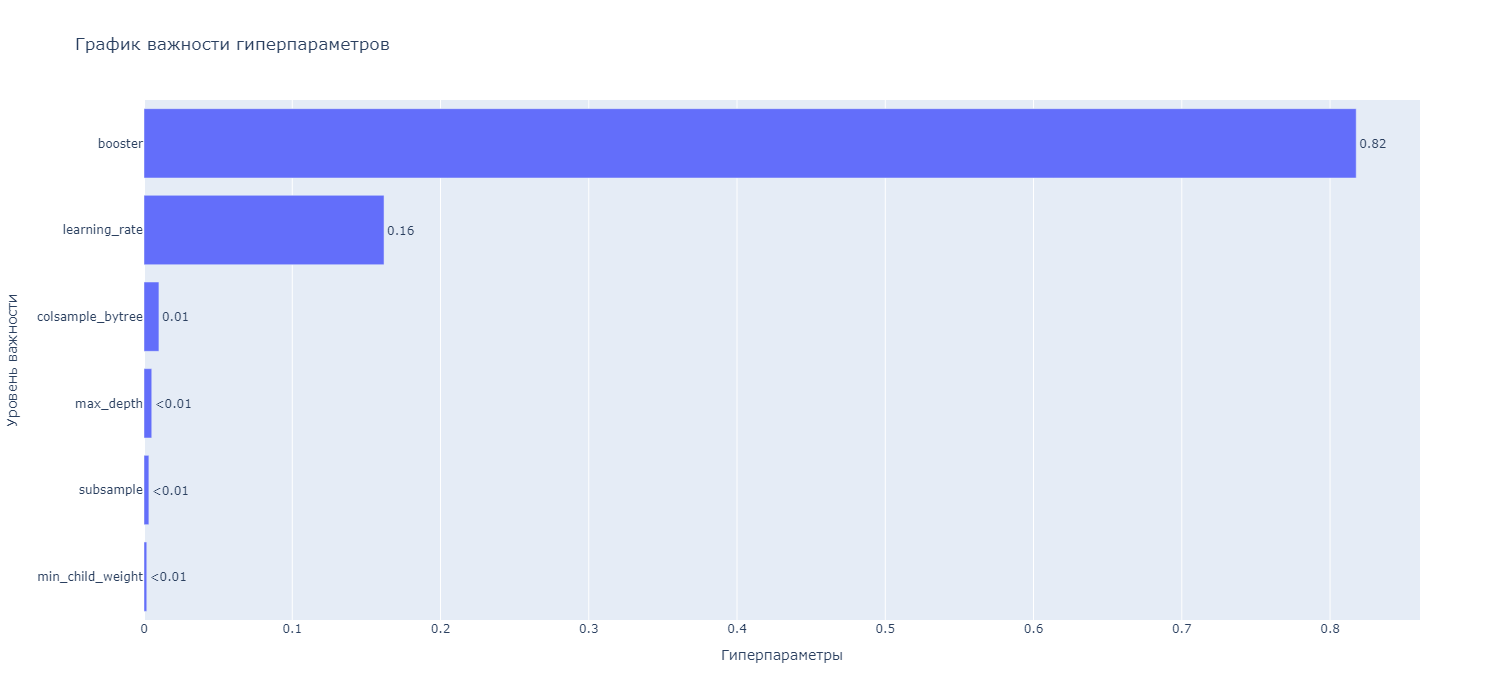

In [84]:
# Построение графика важности гиперпараметров
fig = optuna.visualization.plot_param_importances(study)


# Настройка параметров графика
fig.update_layout(
    title = 'График важности гиперпараметров',
    xaxis_title = 'Гиперпараметры',
    yaxis_title = 'Уровень важности',
    width = 1500,
    height = 700
)

fig.show('png')

2. Построим график истории оптимизации:

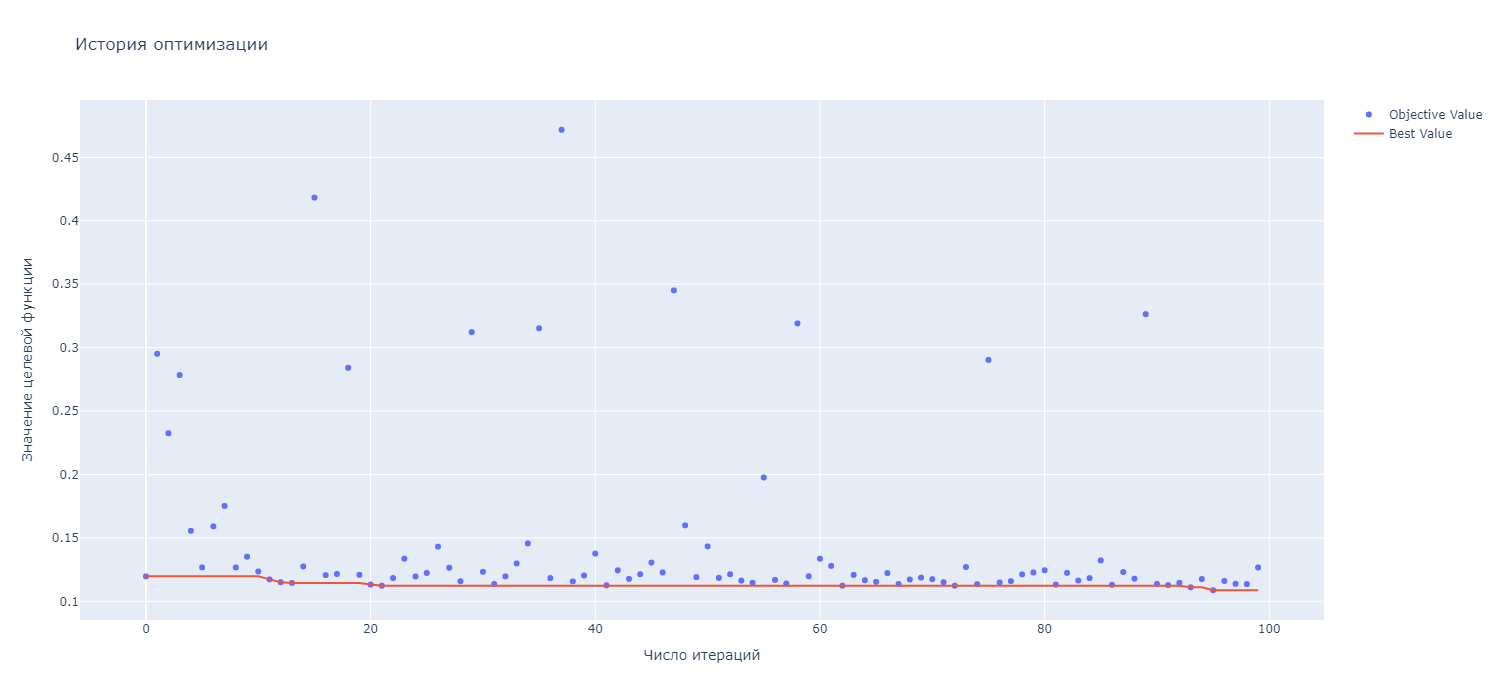

In [52]:
# Построение графика истории оптимизации
fig = optuna.visualization.plot_optimization_history(study)


# Настройка параметров графика
fig.update_layout(
    title = 'История оптимизации',
    xaxis_title = 'Число итераций',
    yaxis_title = 'Значение целевой функции',
    width = 1500,
    height = 700
)

fig.show('png')

3. Построим график среза гиперпараметров:

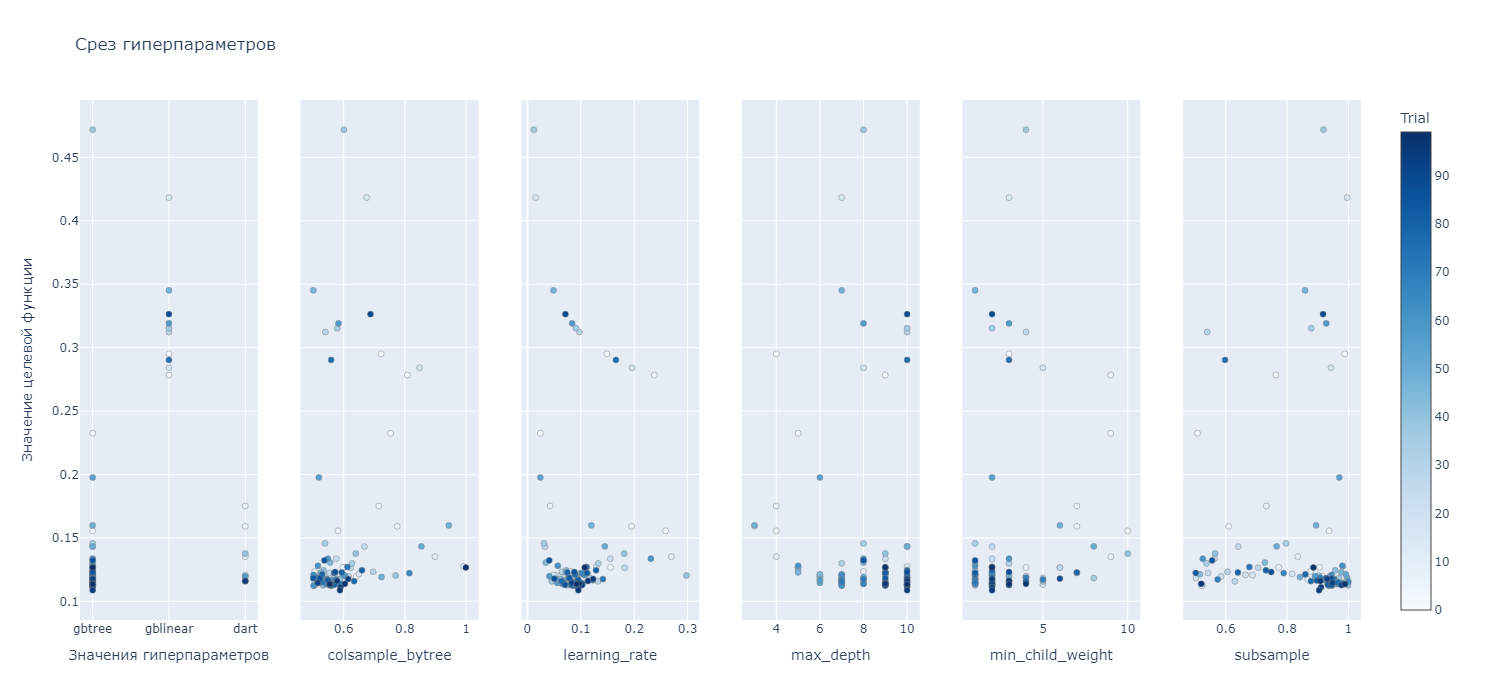

In [53]:
# Построение графика истории оптимизации
fig = optuna.visualization.plot_slice(study)


# Настройка параметров графика
fig.update_layout(
    title = 'Срез гиперпараметров',
    xaxis_title = 'Значения гиперпараметров',
    yaxis_title = 'Значение целевой функции',
    width = 1500,
    height = 700
)

fig.show('png')

4. Построим график контуров:

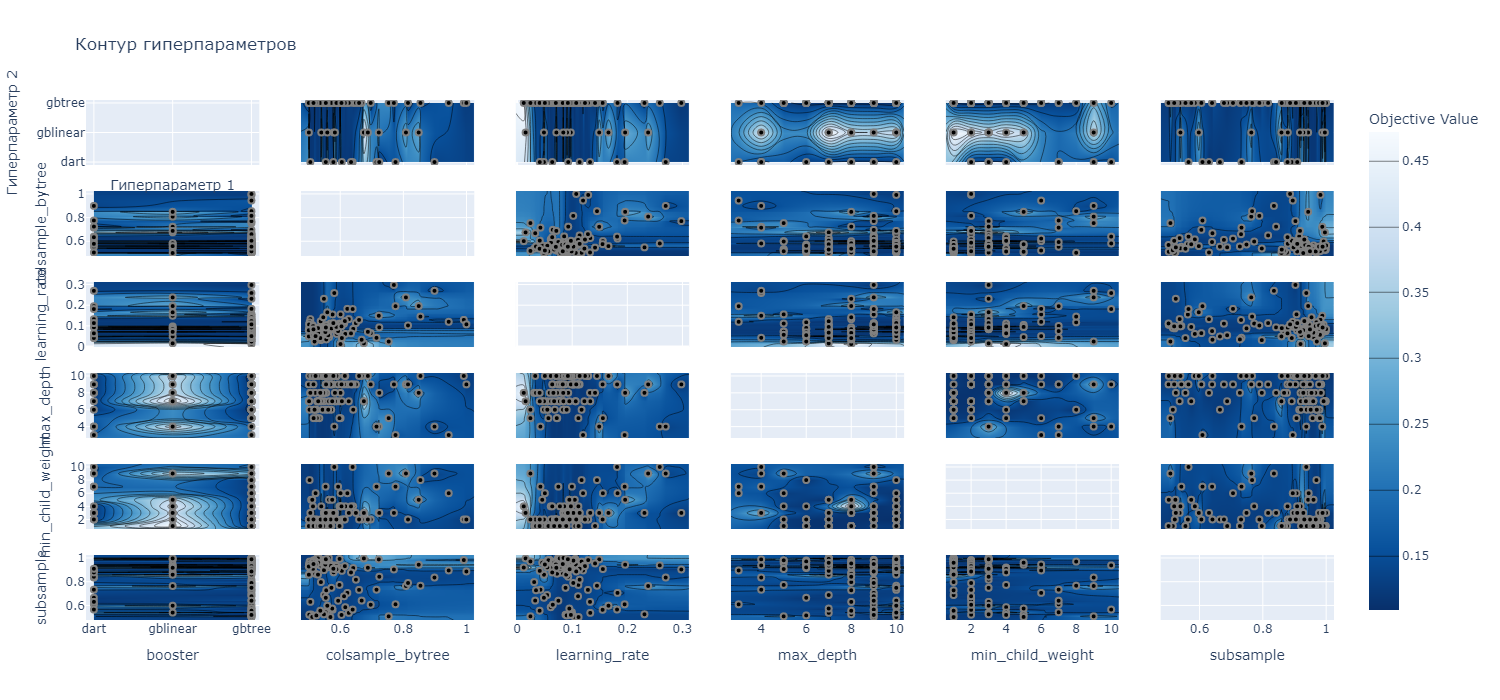

In [54]:
# Построение графика истории оптимизации
fig = optuna.visualization.plot_contour(study)


# Настройка параметров графика
fig.update_layout(
    title = 'Контур гиперпараметров',
    xaxis_title = 'Гиперпараметр 1',
    yaxis_title = 'Гиперпараметр 2',
    width = 1500,
    height = 700
)

fig.show('png')

Обучим модель **XGBRegressor()** на полученных параметрах:

In [85]:
# Применение наилучших гиперпараметров к модели
XGB_Regressor = XGBRegressor(**best_parameters)

# Обучаем модель
XGB_Regressor.fit(X_train_poly, y_train_log)

# Делаем предсказание для обучающей и валидационной выборок
y_train_predict = XGB_Regressor.predict(X_train_poly)
y_valid_predict = XGB_Regressor.predict(X_valid_poly)



# Считаем и выводим метрику RMSLE
print('RMSLE на тренировочной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict))))
print('RMSLE на валидационной выборке: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_predict))))

print()

# Считаем и выводим метрику MAPE
print('MAPE на тренировочной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_train_log, y_train_predict)))
print('MAPE на валидационной выборке: {:.2f}'.format(metrics.mean_absolute_percentage_error(y_valid_log, y_valid_predict)))

RMSLE на тренировочной выборке: 0.02
RMSLE на валидационной выборке: 0.10

MAPE на тренировочной выборке: 0.00
MAPE на валидационной выборке: 0.01


## <CENTER> **`7.` Вывод**

#### $7.1$

Составим таблицу (*DataFrame*) со следующими столбцами:

* `'model_name'` - Наименование модели;

* `'polynomial_features'` - Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False);

* `'RMSLE_train_score'` - Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели;

* `'RMSLE_valid_score'` - Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

In [58]:
# Создаём DataFrame
models_df = pd.DataFrame({
    'model_name'              : ['AutoML', 'LinearRegression', 'Ridge', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'StackingRegressor', 'XGBRegressor'],
    'polynomial_features'     : ['No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'RMSLE_train_score'       : [0.15, 0.42, 0.23, 0.11, 0.05, 0.15, 0.03, 0.01],
    'RMSLE_valid_score'       : [0.15, 0.45, 0.23, 0.18, 0.13, 0.19, 0.12, 0.11]
})


# Выводим таблицу
display(models_df)

model_name polynomial_features  RMSLE_train_score  \
0                     AutoML                  No               0.15   
1           LinearRegression                  No               0.42   
2                      Ridge                 Yes               0.23   
3      DecisionTreeRegressor                 Yes               0.11   
4      RandomForestRegressor                 Yes               0.05   
5  GradientBoostingRegressor                 Yes               0.15   
6          StackingRegressor                 Yes               0.03   
7               XGBRegressor                 Yes               0.01   

   RMSLE_valid_score  
0               0.15  
1               0.45  
2               0.23  
3               0.18  
4               0.13  
5               0.19  
6               0.12  
7               0.11

Среди использованных моделей, самый лучший результат показала модель `XGBRegressor()`, так как она имеет наименьший показатель **RMSLE_valid_score**: $0.11$.

#### $7.2$

Для лучшей модели рассчитаем метрику *MeAE* (**median_absolute_error**) для предсказанной стоимости недвижимости на валидационной выборке:

$$MeAE = median(|y_i-\hat{y_i}|)$$

In [86]:
# Переведем значения стоимости из логарифмических размеров в стандартные
y_valid = np.exp(y_valid_log) - 1
y_valid_predict_exp = np.exp(y_valid_predict) - 1

# Рассчитываем значение метрики
MAE_valid = metrics.median_absolute_error(y_valid, y_valid_predict_exp)

# Выводим значение метрики
print('Предсказанное среднее количество потребляемой энергии на человека: {}(кВт⋅ч)'.format(round(MAE_valid)))

Предсказанное среднее количество потребляемой энергии на человека: 259(кВт⋅ч)
